# P02_01_EDA

In [1]:
section_fig_main_title = 'P02_01_EDA_'

In [2]:
import os, sys
import requests
from urllib.parse import urljoin, urlparse
from bs4 import BeautifulSoup as bs
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pandas.plotting import lag_plot

In [3]:
from pandas.plotting import autocorrelation_plot


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [6]:
from sklearn import metrics
import statsmodels.api as sm

## Read Data

the page html file downloaded in Data directory and it is loaded below.

In [7]:
csv_path = "../Data/Data_ICME_scraped.csv"
df = pd.read_csv(csv_path, parse_dates=True)

In [8]:
df.head(2)

,Unnamed: 0,Disturbance Y/M/D (UT) (a),ICME Plasma/Field Start Y/M/D (UT) (b),ICME Plasma/Field End Y/M/D (UT) (b),Comp. Start (Hrs wrt. Plasma/ Field) (c),Comp. End (Hrs wrt. Plasma/ Field) (c),MC Start (Hrs wrt. Plasma/ Field) (d),End (Hrs wrt. Plasma/ Field) (d),BDE? (e),BIF? (f),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n),LASCO CME Y/M/D (UT) (o)
0,0,1996/05/27 1500,1996/05/27 1500,1996/05/29 0300,...,...,0,+4,N,...,2,0,370,400,9,2,-33,...,NaN
1,1,1996/07/01 1320,1996/07/01 1800,1996/07/02 1100,...,...,0,0,N,...,3,40,360,370,11,2,-20,...,NaN


In [9]:
df = df.drop(columns=['Unnamed: 0'])

In [10]:
df.head()

,Disturbance Y/M/D (UT) (a),ICME Plasma/Field Start Y/M/D (UT) (b),ICME Plasma/Field End Y/M/D (UT) (b),Comp. Start (Hrs wrt. Plasma/ Field) (c),Comp. End (Hrs wrt. Plasma/ Field) (c),MC Start (Hrs wrt. Plasma/ Field) (d),End (Hrs wrt. Plasma/ Field) (d),BDE? (e),BIF? (f),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n),LASCO CME Y/M/D (UT) (o)
0,1996/05/27 1500,1996/05/27 1500,1996/05/29 0300,...,...,0,+4,N,...,2,0,370,400,9,2,-33,...,NaN
1,1996/07/01 1320,1996/07/01 1800,1996/07/02 1100,...,...,0,0,N,...,3,40,360,370,11,2,-20,...,NaN
2,1996/08/07 0600,1996/08/07 1200,1996/08/08 1000,...,...,0,0,N,...,2,10,350,380,7,2,-23,...,NaN
3,1996/12/23 1600,1996/12/23 1700,1996/12/25 1100,...,...,+10,0,N,...,2,20,360,420,10,2,-18,435,1996/12/19 1630 H
4,1997/01/10 0104,1997/01/10 0400,1997/01/11 0200,...,...,0,0,Y,...,1,100 S,450,460,14,2,-78,507,1997/01/06 1510 H


In [11]:
df.isnull().sum()

Disturbance Y/M/D (UT) (a)                    0
ICME Plasma/Field Start Y/M/D (UT) (b)        0
ICME Plasma/Field End Y/M/D (UT) (b)          0
Comp. Start (Hrs wrt. Plasma/ Field) (c)      0
Comp. End (Hrs wrt. Plasma/ Field) (c)        0
MC Start (Hrs wrt. Plasma/ Field) (d)         0
End (Hrs wrt. Plasma/ Field) (d)              0
BDE? (e)                                      0
BIF? (f)                                      0
Qual. (g)                                     0
dV (km/s) (h)                                 0
V_ICME (km/s) (i)                             0
V_max (km/s) (j)                              0
B (nT) (k)                                    0
MC? (l)                                       0
Dst (nT) (m)                                  0
V_transit (km/s) (n)                          1
LASCO CME Y/M/D (UT) (o)                    235
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 18 columns):
Disturbance Y/M/D (UT) (a)                  513 non-null object
ICME Plasma/Field Start Y/M/D (UT) (b)      513 non-null object
ICME Plasma/Field End Y/M/D (UT) (b)        513 non-null object
Comp. Start (Hrs wrt. Plasma/ Field) (c)    513 non-null object
Comp. End (Hrs wrt. Plasma/ Field) (c)      513 non-null object
MC Start (Hrs wrt. Plasma/ Field) (d)       513 non-null object
End (Hrs wrt. Plasma/ Field) (d)            513 non-null object
BDE? (e)                                    513 non-null object
BIF? (f)                                    513 non-null object
Qual. (g)                                   513 non-null object
dV (km/s) (h)                               513 non-null object
V_ICME (km/s) (i)                           513 non-null int64
V_max (km/s) (j)                            513 non-null int64
B (nT) (k)                                  513 non-null int64
MC

In [13]:
df.describe()

,V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k)
count,513.000000,513.000000,513.000000
mean,454.405458,524.795322,9.709552
std,103.537467,159.000808,4.325552
min,290.000000,310.000000,2.000000
25%,390.000000,420.000000,7.000000
50%,430.000000,490.000000,9.000000
75%,500.000000,590.000000,12.000000
max,1300.000000,1900.000000,33.000000


In [14]:
df.columns

Index(['Disturbance Y/M/D (UT) (a)', 'ICME Plasma/Field Start Y/M/D (UT) (b)',
       'ICME Plasma/Field End Y/M/D (UT) (b)',
       'Comp. Start (Hrs wrt. Plasma/ Field) (c)',
       'Comp. End (Hrs wrt. Plasma/ Field) (c)',
       'MC Start (Hrs wrt. Plasma/ Field) (d)',
       'End (Hrs wrt. Plasma/ Field) (d)', 'BDE? (e)', 'BIF? (f)', 'Qual. (g)',
       'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'V_max (km/s) (j)', 'B (nT) (k)',
       'MC? (l)', 'Dst (nT) (m)', 'V_transit (km/s) (n)',
       'LASCO CME Y/M/D (UT) (o)'],
      dtype='object')

### Fixing the date time format

In [15]:
df.columns

Index(['Disturbance Y/M/D (UT) (a)', 'ICME Plasma/Field Start Y/M/D (UT) (b)',
       'ICME Plasma/Field End Y/M/D (UT) (b)',
       'Comp. Start (Hrs wrt. Plasma/ Field) (c)',
       'Comp. End (Hrs wrt. Plasma/ Field) (c)',
       'MC Start (Hrs wrt. Plasma/ Field) (d)',
       'End (Hrs wrt. Plasma/ Field) (d)', 'BDE? (e)', 'BIF? (f)', 'Qual. (g)',
       'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'V_max (km/s) (j)', 'B (nT) (k)',
       'MC? (l)', 'Dst (nT) (m)', 'V_transit (km/s) (n)',
       'LASCO CME Y/M/D (UT) (o)'],
      dtype='object')

In [16]:
df['ICME Plasma/Field Start Y/M/D (UT) (b)'].head()

0    1996/05/27 1500
1    1996/07/01 1800
2    1996/08/07 1200
3    1996/12/23 1700
4    1997/01/10 0400
Name: ICME Plasma/Field Start Y/M/D (UT) (b), dtype: object

As it is seen, the format of data is as follow ```1997/01/10 0400```.
Let's fix the format below.

For example:

In [17]:
str_ = '1997/01/10 0400'

date_object = pd.to_datetime(str_, infer_datetime_format=True)
date_object 

Timestamp('1997-01-10 04:00:00')

fix the date time fol columns ```ICME Plasma/Field Start Y/M/D (UT) (b)``` and ```ICME Plasma/Field End Y/M/D (UT) (b)``` as follow.

In [18]:
df['ICME Plasma/Field Start Y/M/D (UT) (b)'] = pd.to_datetime(df['ICME Plasma/Field Start Y/M/D (UT) (b)'], infer_datetime_format=True)
df.head()

,Disturbance Y/M/D (UT) (a),ICME Plasma/Field Start Y/M/D (UT) (b),ICME Plasma/Field End Y/M/D (UT) (b),Comp. Start (Hrs wrt. Plasma/ Field) (c),Comp. End (Hrs wrt. Plasma/ Field) (c),MC Start (Hrs wrt. Plasma/ Field) (d),End (Hrs wrt. Plasma/ Field) (d),BDE? (e),BIF? (f),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n),LASCO CME Y/M/D (UT) (o)
0,1996/05/27 1500,1996-05-27 15:00:00,1996/05/29 0300,...,...,0,+4,N,...,2,0,370,400,9,2,-33,...,NaN
1,1996/07/01 1320,1996-07-01 18:00:00,1996/07/02 1100,...,...,0,0,N,...,3,40,360,370,11,2,-20,...,NaN
2,1996/08/07 0600,1996-08-07 12:00:00,1996/08/08 1000,...,...,0,0,N,...,2,10,350,380,7,2,-23,...,NaN
3,1996/12/23 1600,1996-12-23 17:00:00,1996/12/25 1100,...,...,+10,0,N,...,2,20,360,420,10,2,-18,435,1996/12/19 1630 H
4,1997/01/10 0104,1997-01-10 04:00:00,1997/01/11 0200,...,...,0,0,Y,...,1,100 S,450,460,14,2,-78,507,1997/01/06 1510 H


In [19]:
df['ICME Plasma/Field End Y/M/D (UT) (b)'] = pd.to_datetime(df['ICME Plasma/Field End Y/M/D (UT) (b)'], infer_datetime_format=True)
df.head()

,Disturbance Y/M/D (UT) (a),ICME Plasma/Field Start Y/M/D (UT) (b),ICME Plasma/Field End Y/M/D (UT) (b),Comp. Start (Hrs wrt. Plasma/ Field) (c),Comp. End (Hrs wrt. Plasma/ Field) (c),MC Start (Hrs wrt. Plasma/ Field) (d),End (Hrs wrt. Plasma/ Field) (d),BDE? (e),BIF? (f),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n),LASCO CME Y/M/D (UT) (o)
0,1996/05/27 1500,1996-05-27 15:00:00,1996-05-29 03:00:00,...,...,0,+4,N,...,2,0,370,400,9,2,-33,...,NaN
1,1996/07/01 1320,1996-07-01 18:00:00,1996-07-02 11:00:00,...,...,0,0,N,...,3,40,360,370,11,2,-20,...,NaN
2,1996/08/07 0600,1996-08-07 12:00:00,1996-08-08 10:00:00,...,...,0,0,N,...,2,10,350,380,7,2,-23,...,NaN
3,1996/12/23 1600,1996-12-23 17:00:00,1996-12-25 11:00:00,...,...,+10,0,N,...,2,20,360,420,10,2,-18,435,1996/12/19 1630 H
4,1997/01/10 0104,1997-01-10 04:00:00,1997-01-11 02:00:00,...,...,0,0,Y,...,1,100 S,450,460,14,2,-78,507,1997/01/06 1510 H


select four columns including ```'ICME Plasma/Field Start Y/M/D (UT) (b)', 'V_ICME (km/s) (i)','V_max (km/s) (j)','B (nT) (k)' ```.

These three main columns are:

* Mean ICME speed, based on solar wind speed observations during the period from (b) to (c) above.

* Maximum solar wind speed during the period from the disturbance (a) to the trailing edge of the ICME (c).

* Mean magnetic field strength in the ICME, based on the interval from (b) to (c), to the nearest 1 nT.

[definations](http://www.srl.caltech.edu/ACE/ASC/DATA/level3/icmetable2.htm#(k))

In [20]:
cols = ['ICME Plasma/Field Start Y/M/D (UT) (b)', 'V_ICME (km/s) (i)','V_max (km/s) (j)','B (nT) (k)']

numeric_df = df[cols]
numeric_df.head()

,ICME Plasma/Field Start Y/M/D (UT) (b),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k)
0,1996-05-27 15:00:00,370,400,9
1,1996-07-01 18:00:00,360,370,11
2,1996-08-07 12:00:00,350,380,7
3,1996-12-23 17:00:00,360,420,10
4,1997-01-10 04:00:00,450,460,14


In [21]:
numeric_df.index = numeric_df['ICME Plasma/Field Start Y/M/D (UT) (b)']
numeric_df = numeric_df.drop(['ICME Plasma/Field Start Y/M/D (UT) (b)'], axis=1)
numeric_df.head()

,V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k)
ICME Plasma/Field Start Y/M/D (UT) (b),,,
1996-05-27 15:00:00,370,400,9
1996-07-01 18:00:00,360,370,11
1996-08-07 12:00:00,350,380,7
1996-12-23 17:00:00,360,420,10
1997-01-10 04:00:00,450,460,14


In [22]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 513 entries, 1996-05-27 15:00:00 to 2021-05-26 22:00:00
Data columns (total 3 columns):
V_ICME (km/s) (i)    513 non-null int64
V_max (km/s) (j)     513 non-null int64
B (nT) (k)           513 non-null int64
dtypes: int64(3)
memory usage: 16.0 KB


In [23]:
numeric_df.describe()

,V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k)
count,513.000000,513.000000,513.000000
mean,454.405458,524.795322,9.709552
std,103.537467,159.000808,4.325552
min,290.000000,310.000000,2.000000
25%,390.000000,420.000000,7.000000
50%,430.000000,490.000000,9.000000
75%,500.000000,590.000000,12.000000
max,1300.000000,1900.000000,33.000000


## Plot data

In [24]:
plt.rcParams["font.size"] = "12"

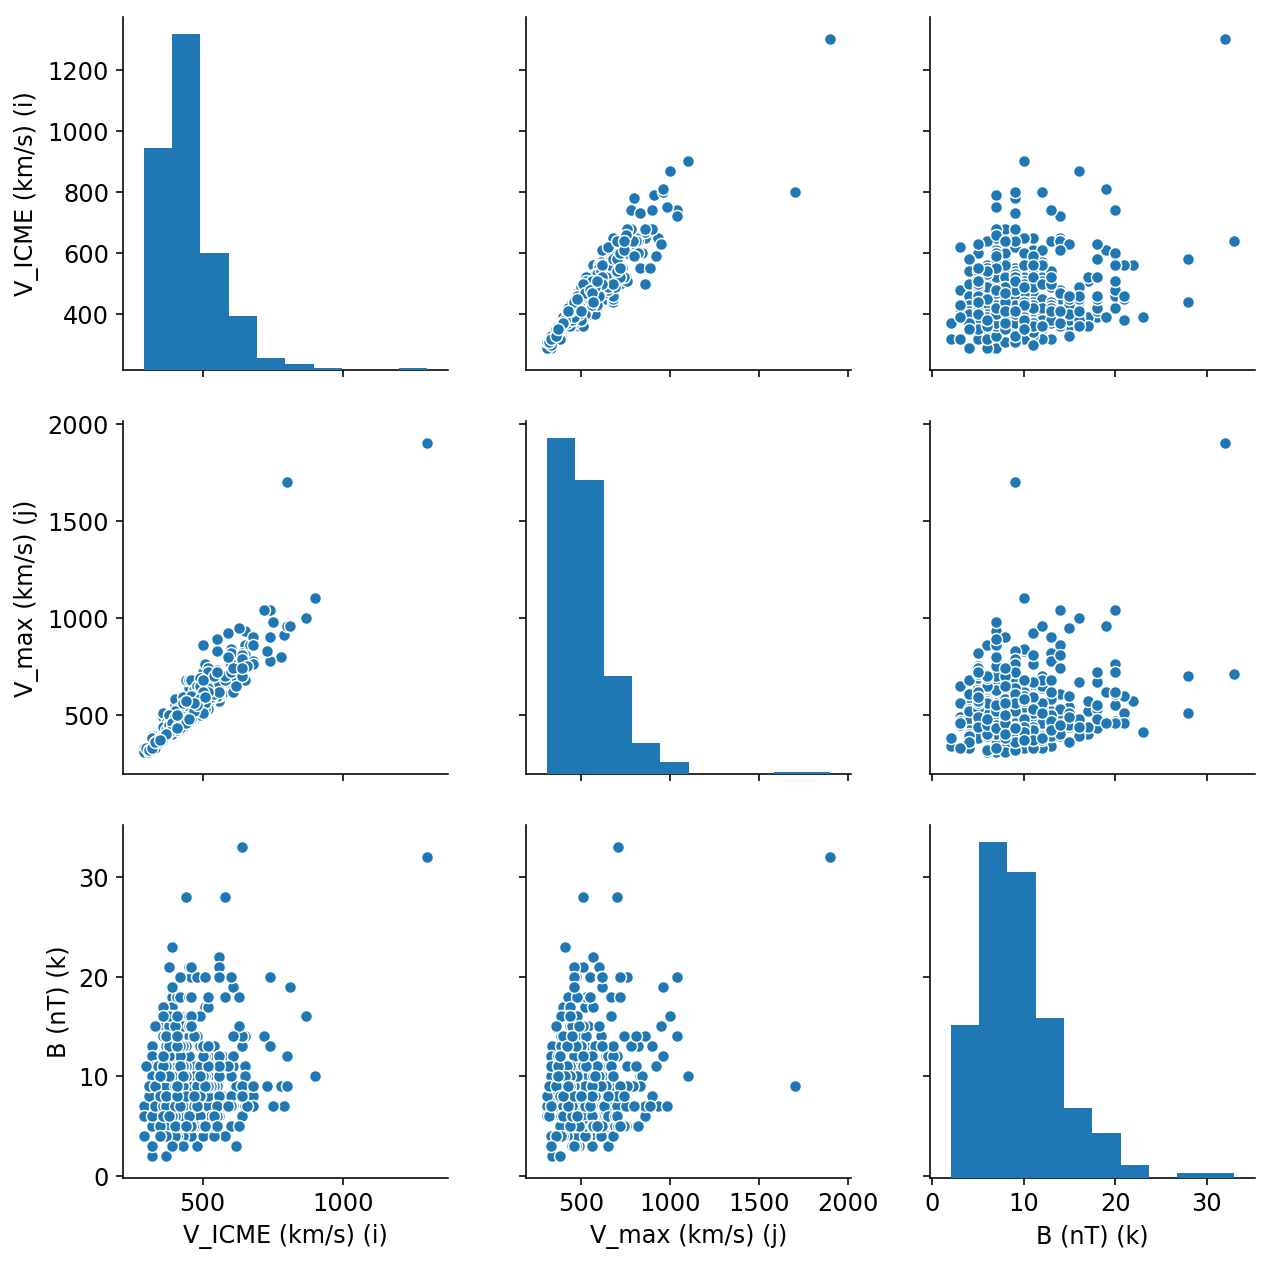

In [25]:
sns.pairplot(numeric_df, height=3)

It is seen that the numeric data distribution is a little bit skewed to right. The skewed data can be fixed using transforming. However, before transforming the data let's check out the data for outliers.

In [26]:
df.columns

Index(['Disturbance Y/M/D (UT) (a)', 'ICME Plasma/Field Start Y/M/D (UT) (b)',
       'ICME Plasma/Field End Y/M/D (UT) (b)',
       'Comp. Start (Hrs wrt. Plasma/ Field) (c)',
       'Comp. End (Hrs wrt. Plasma/ Field) (c)',
       'MC Start (Hrs wrt. Plasma/ Field) (d)',
       'End (Hrs wrt. Plasma/ Field) (d)', 'BDE? (e)', 'BIF? (f)', 'Qual. (g)',
       'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'V_max (km/s) (j)', 'B (nT) (k)',
       'MC? (l)', 'Dst (nT) (m)', 'V_transit (km/s) (n)',
       'LASCO CME Y/M/D (UT) (o)'],
      dtype='object')

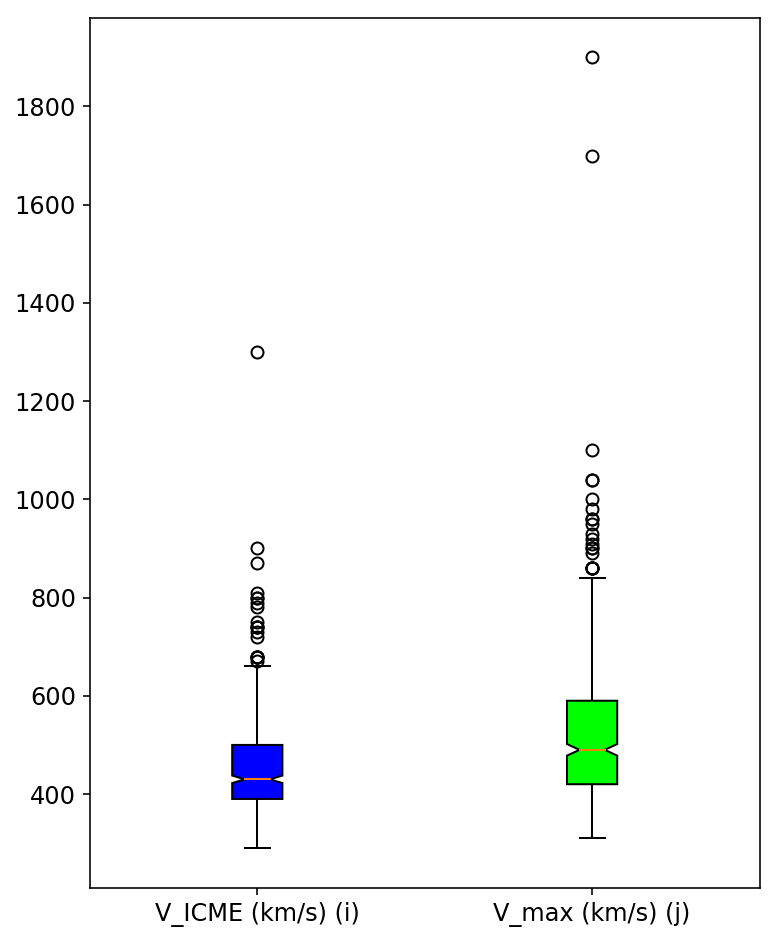

In [27]:
V_ICME = df["V_ICME (km/s) (i)"]
V_ICME_max = df['V_max (km/s) (j)']
BB = df['B (nT) (k)']

columns = [V_ICME, V_ICME_max]#, BB]
fig, ax = plt.subplots(figsize=(6,8))
box = ax.boxplot(columns, notch=True, patch_artist=True)
plt.xticks([1, 2], ['V_ICME (km/s) (i)', 'V_max (km/s) (j)'])#, 'B (nT) (k)'])

colors = ['#0000FF', '#00FF00']#'#FFFF00']#, '#FF00FF']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.savefig("../Figures/" + section_fig_main_title +"boxplot_1.png")

plt.show()

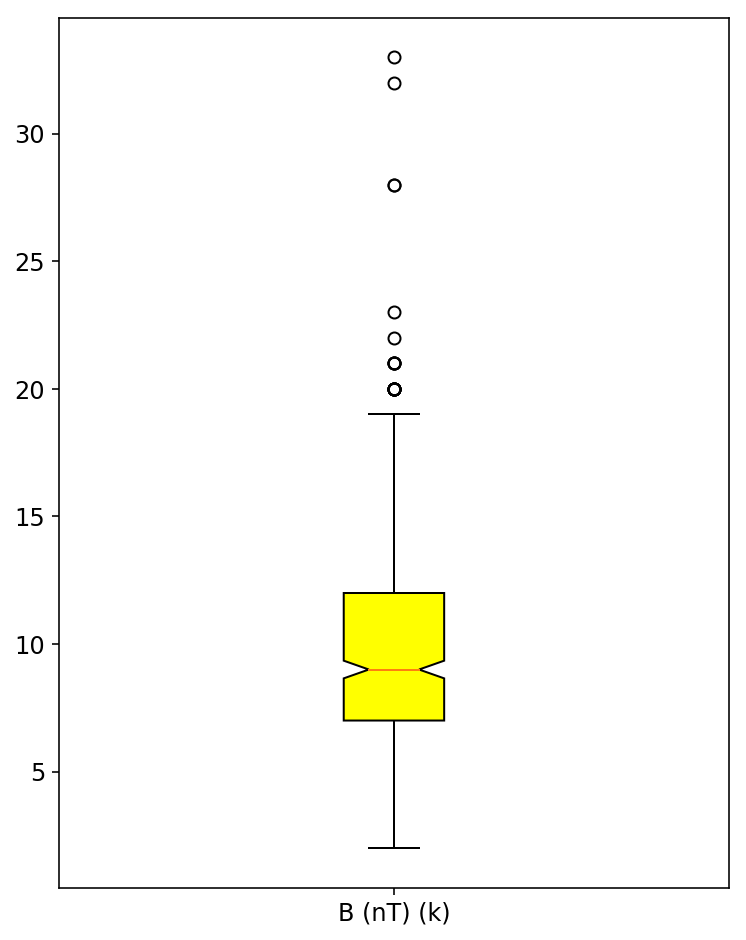

In [28]:
BB = df['B (nT) (k)']

columns = [BB]
fig, ax = plt.subplots(figsize=(6,8))
box = ax.boxplot(columns, notch=True, 
                 patch_artist=True)

plt.xticks([1], ['B (nT) (k)'])

colors = ['#FFFF00']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.savefig("../Figures/" + section_fig_main_title +"boxplot_2.png")

plt.show()

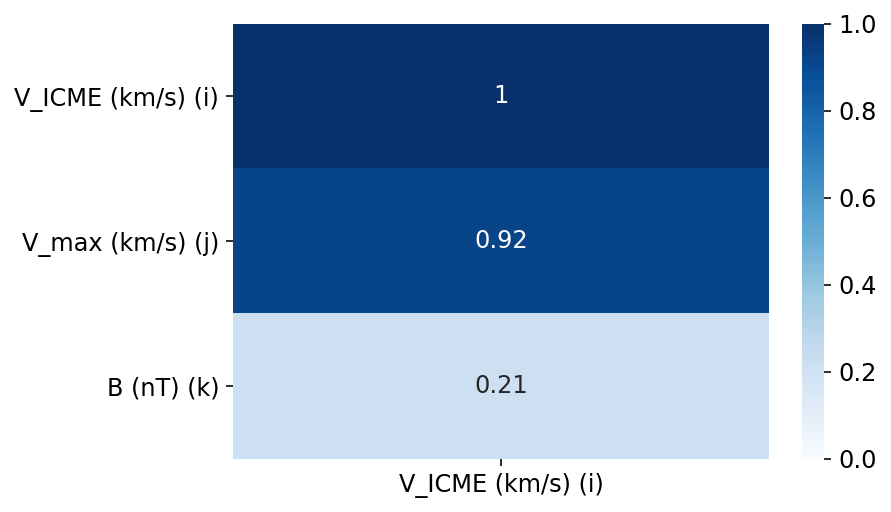

In [29]:
df_corr = numeric_df.corr().abs()

#plt.figure(figsize=(6,6))
plt.figure(figsize=(6,4))
sns.heatmap(df_corr[['V_ICME (km/s) (i)']].sort_values(by=['V_ICME (km/s) (i)'],ascending=False),
            vmin=0,
            cmap='Blues',
            annot=True);
plt.savefig("../Figures/" + section_fig_main_title +"plt1_corr_1.png")
plt.show()

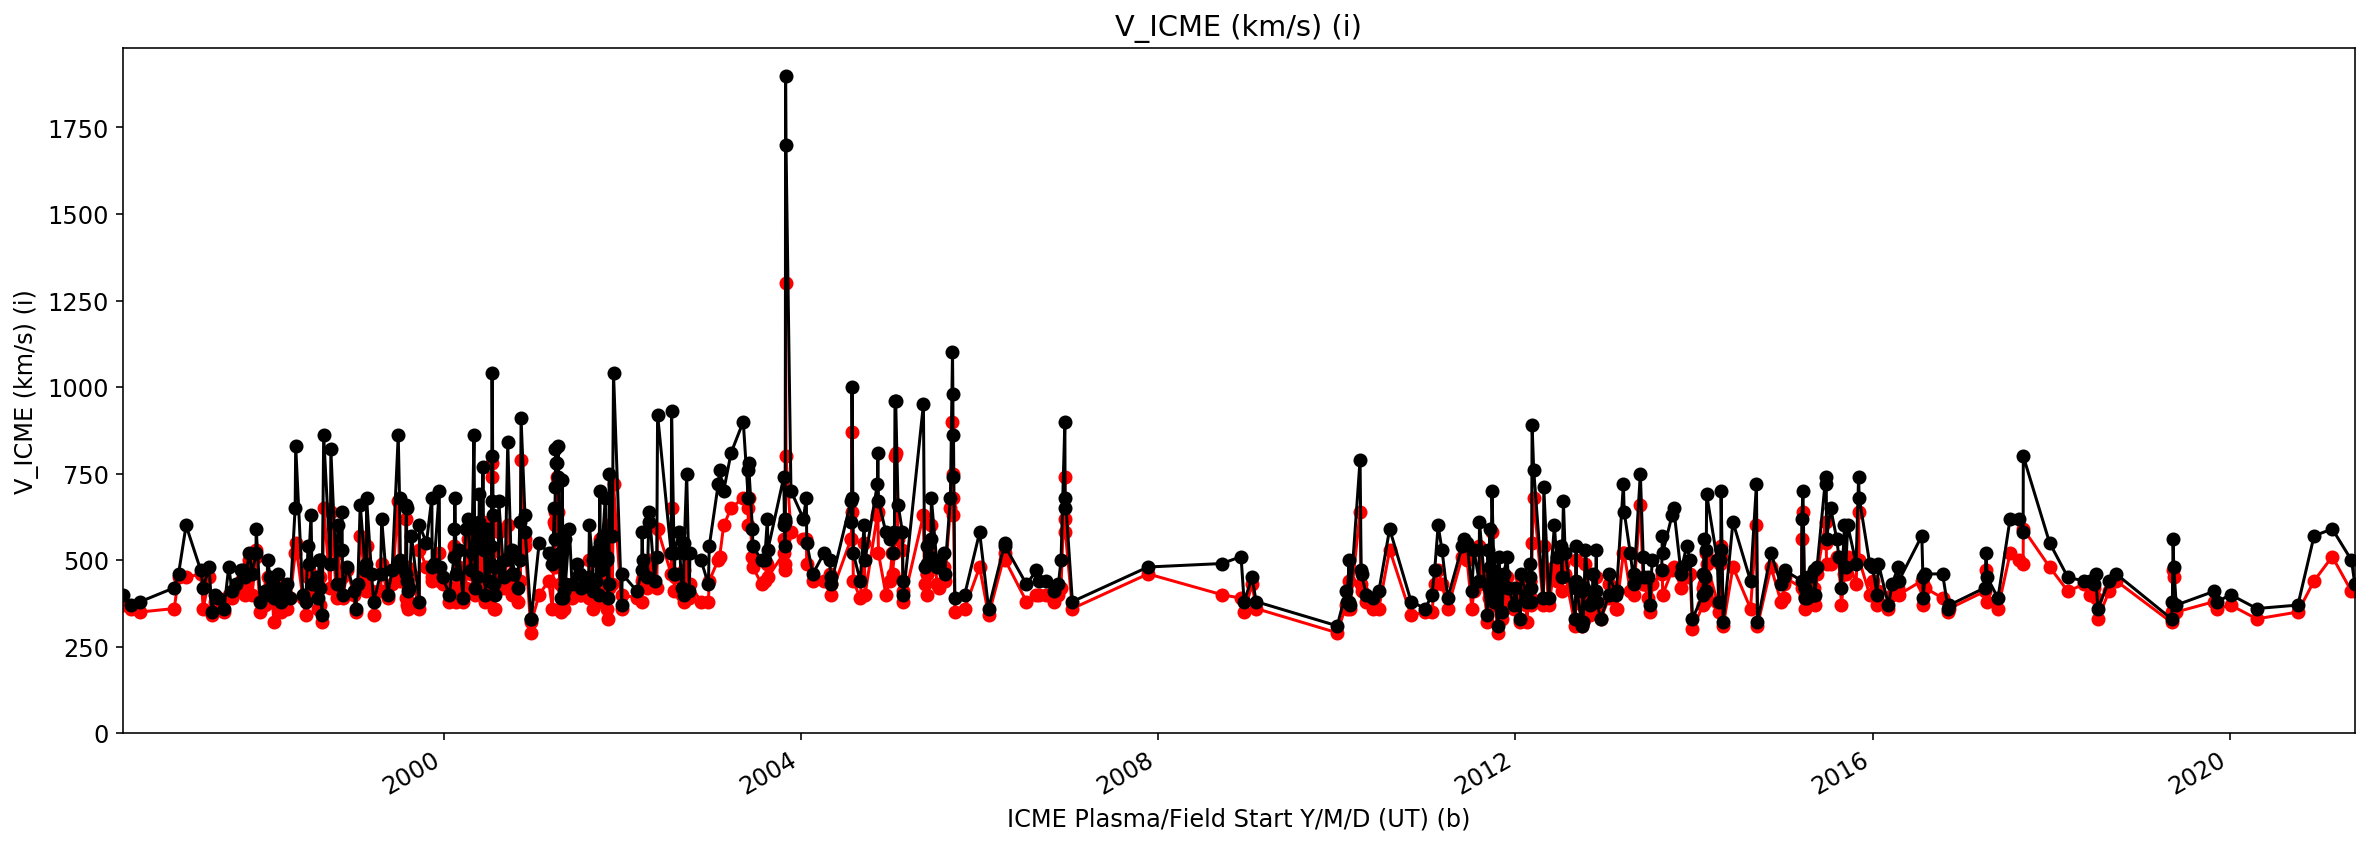

In [30]:
plt.figure(figsize=(20,7))
numeric_df["V_ICME (km/s) (i)"].plot(style="ro-")
numeric_df["V_max (km/s) (j)"].plot(style="ko-")


plt.title("V_ICME (km/s) (i)")
plt.ylabel("V_ICME (km/s) (i)")
plt.ylim(0,)

plt.savefig("../Figures/" + section_fig_main_title +"plt1.png")

plt.show()

it is clear that there are some lack of data in some time intervals around 2008 to 2011.

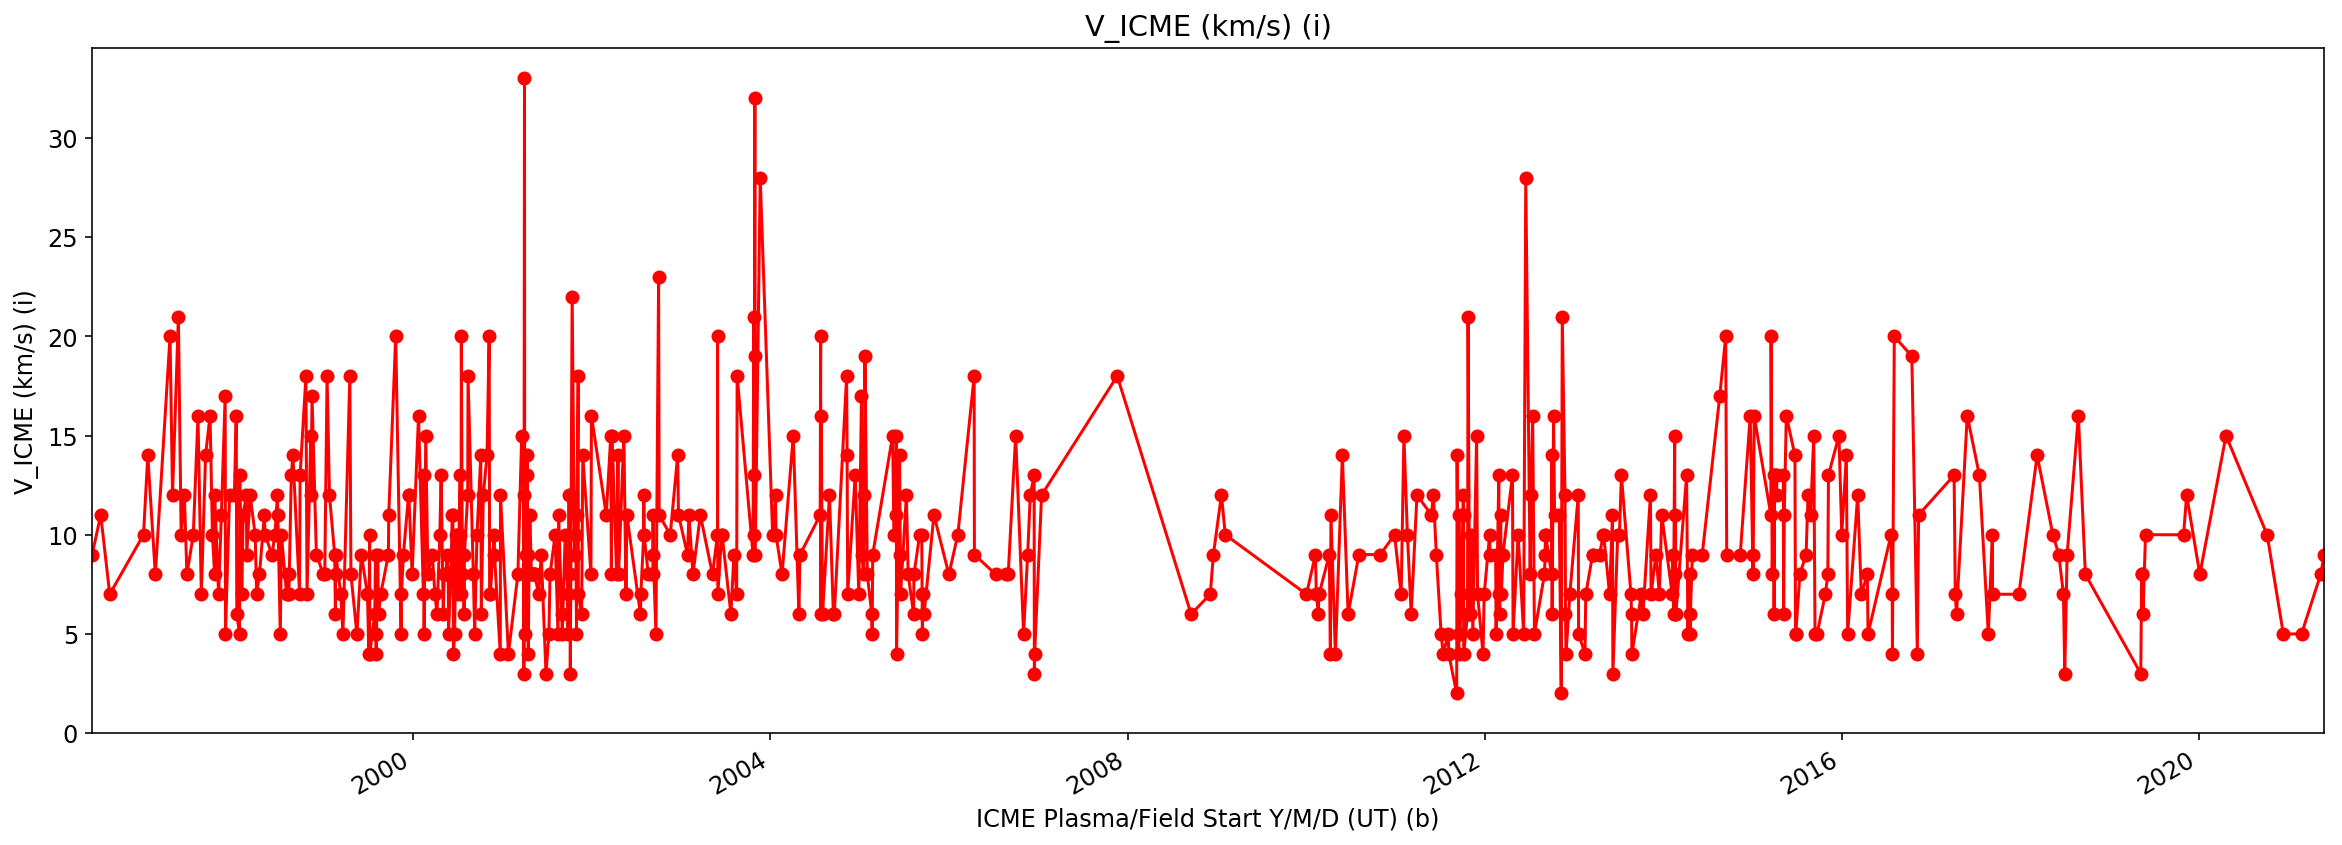

In [31]:
plt.figure(figsize=(20,7))
numeric_df["B (nT) (k)"].plot(style="ro-")



plt.title("V_ICME (km/s) (i)")
plt.ylabel("V_ICME (km/s) (i)")
plt.ylim(0,)

plt.savefig("../Figures/" + section_fig_main_title +"plt2.png")

plt.show()

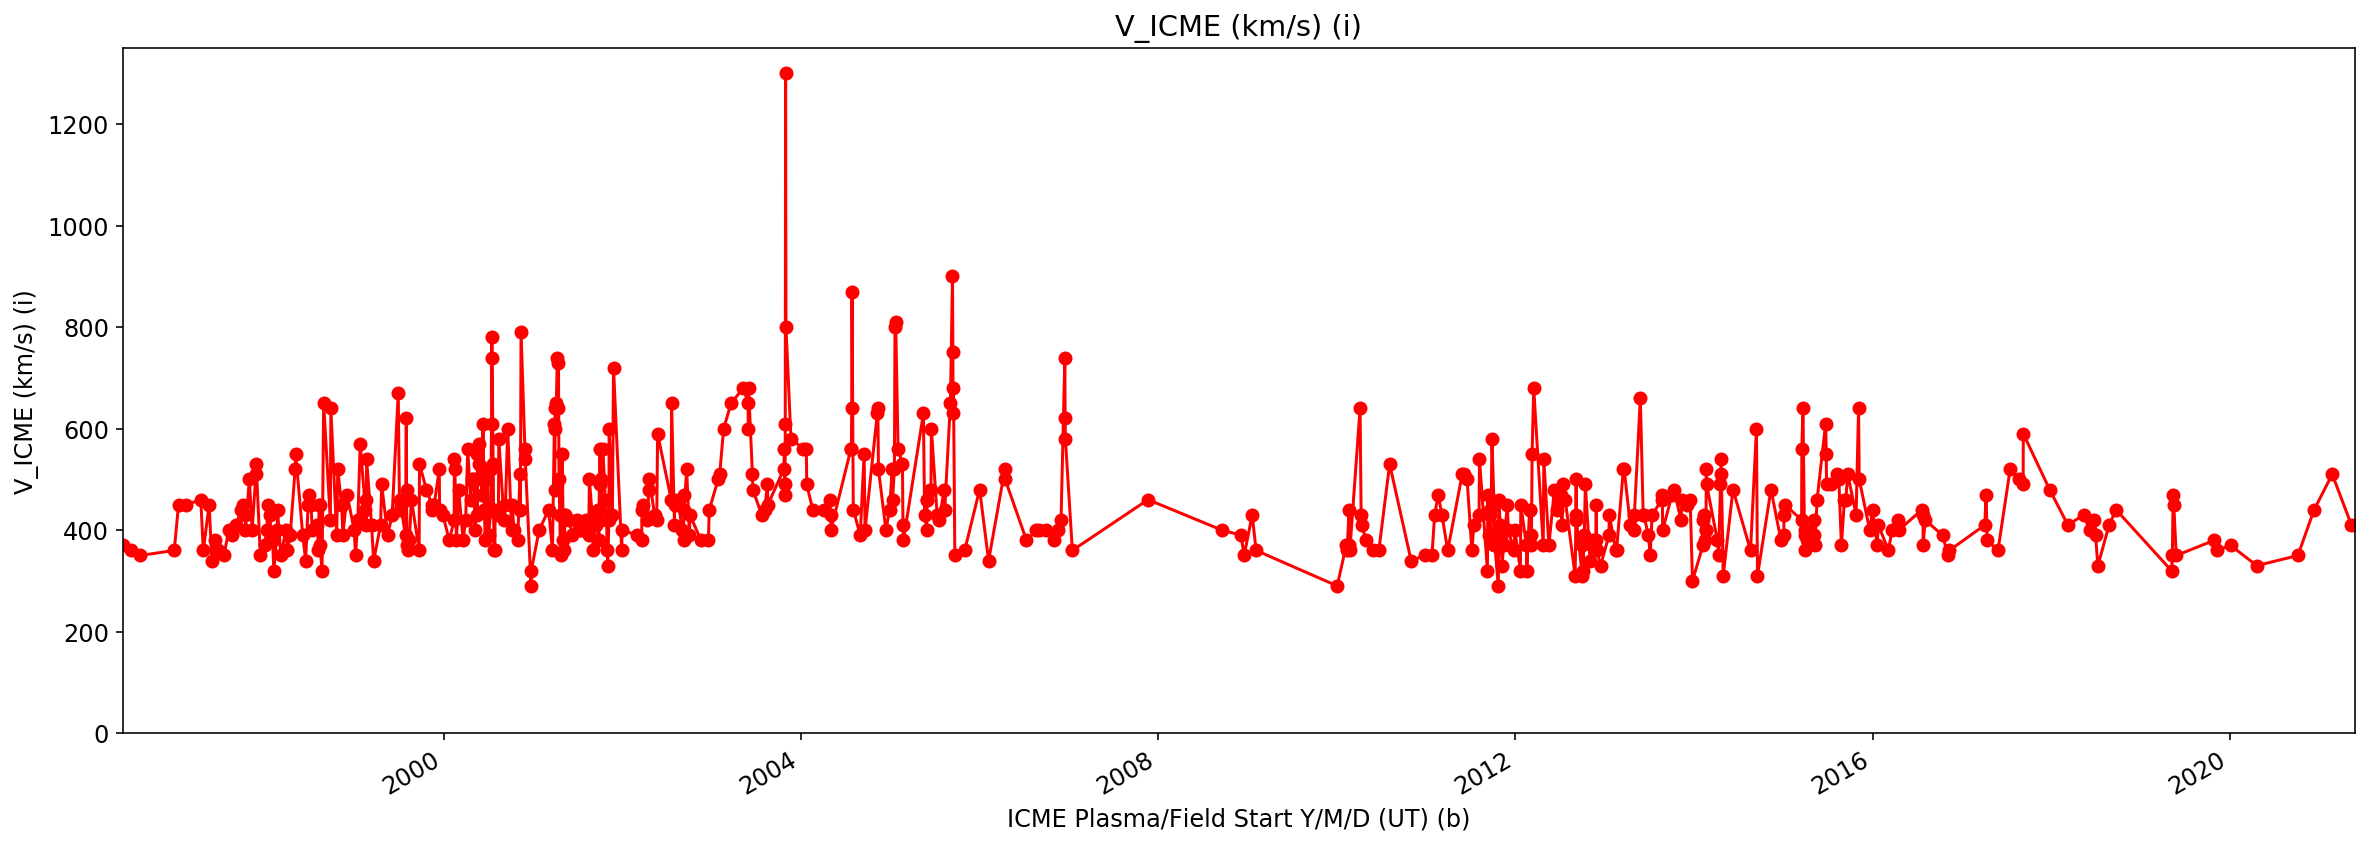

In [32]:
plt.figure(figsize=(20,7))
numeric_df["V_ICME (km/s) (i)"].plot(style="ro-")


plt.title("V_ICME (km/s) (i)")
plt.ylabel("V_ICME (km/s) (i)")
plt.ylim(0,)
plt.savefig("../Figures/" + section_fig_main_title +"plt33.png")

plt.show()

In [33]:
numeric_df.dtypes

V_ICME (km/s) (i)    int64
V_max (km/s) (j)     int64
B (nT) (k)           int64
dtype: object

fit a linear regression model on data.

In [34]:
lr = LinearRegression()
X = numeric_df[['V_max (km/s) (j)', 'B (nT) (k)']]
y = numeric_df['V_ICME (km/s) (i)']
lr.fit(X, y)
y_pred = lr.predict(X)

In [35]:
score = lr.score(X, y)
MAE = metrics.mean_absolute_error(y, y_pred)

In [36]:
plt.rcParams["figure.figsize"] = (8, 8)
# plt.rcParams["font.family"] = "Times New Roman"

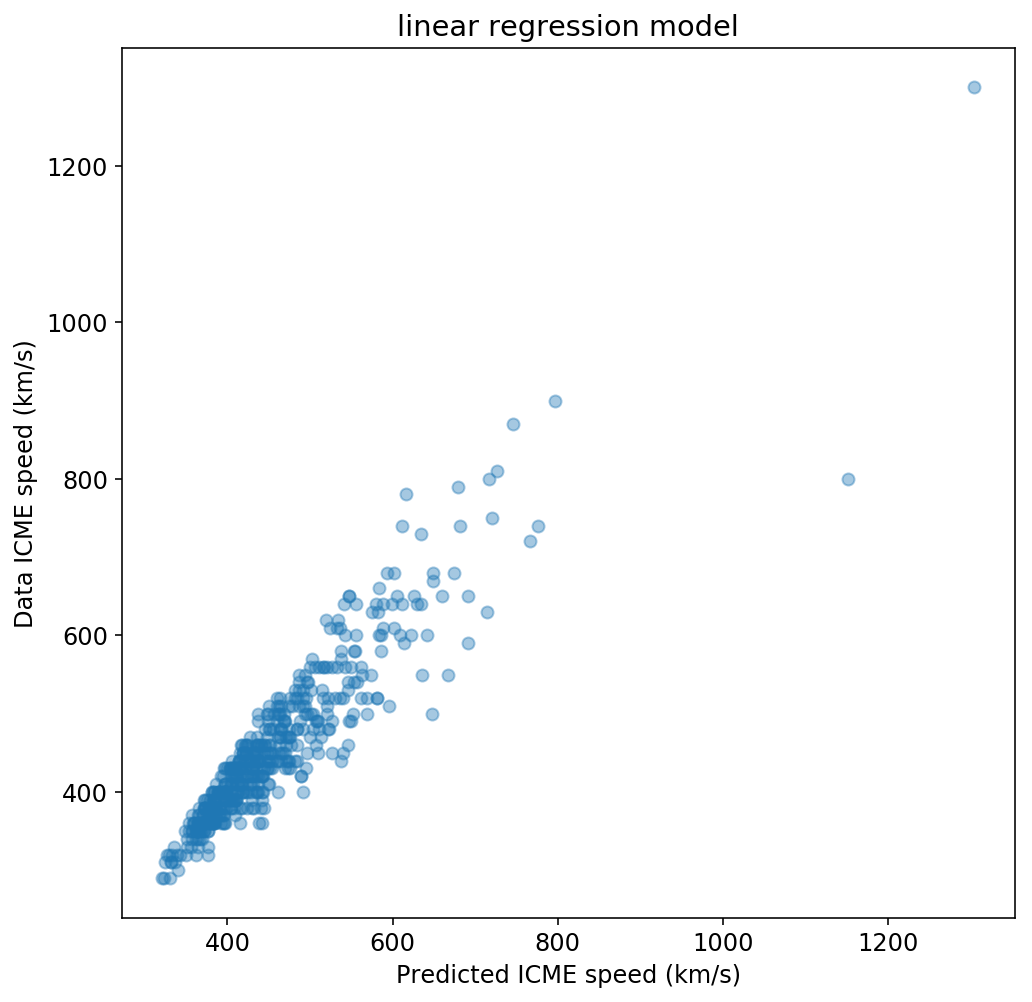

In [37]:
plt.scatter(y_pred, y, alpha=0.4)
plt.xlabel("Predicted ICME speed (km/s)")
plt.ylabel("Data ICME speed (km/s)")
plt.title("linear regression model")
plt.savefig("../Figures/" + section_fig_main_title +"lr_1.png")

plt.show()

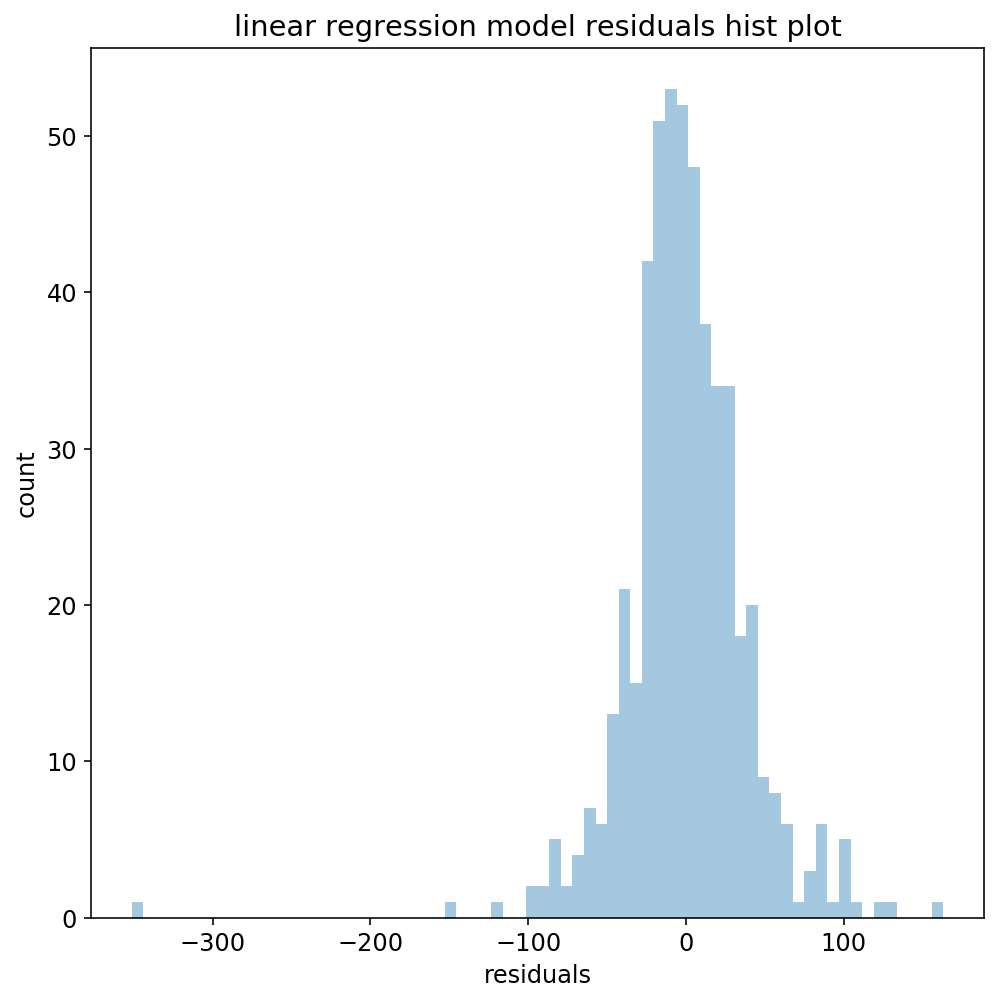

In [38]:

# Creat residuals
resids = y - y_pred
# N assumption:
plt.hist(resids, bins=70, alpha=0.4);
plt.xlabel("residuals")
plt.ylabel("count")
plt.title("linear regression model residuals hist plot")
plt.savefig("../Figures/" + section_fig_main_title +"lr_residu_1.png")

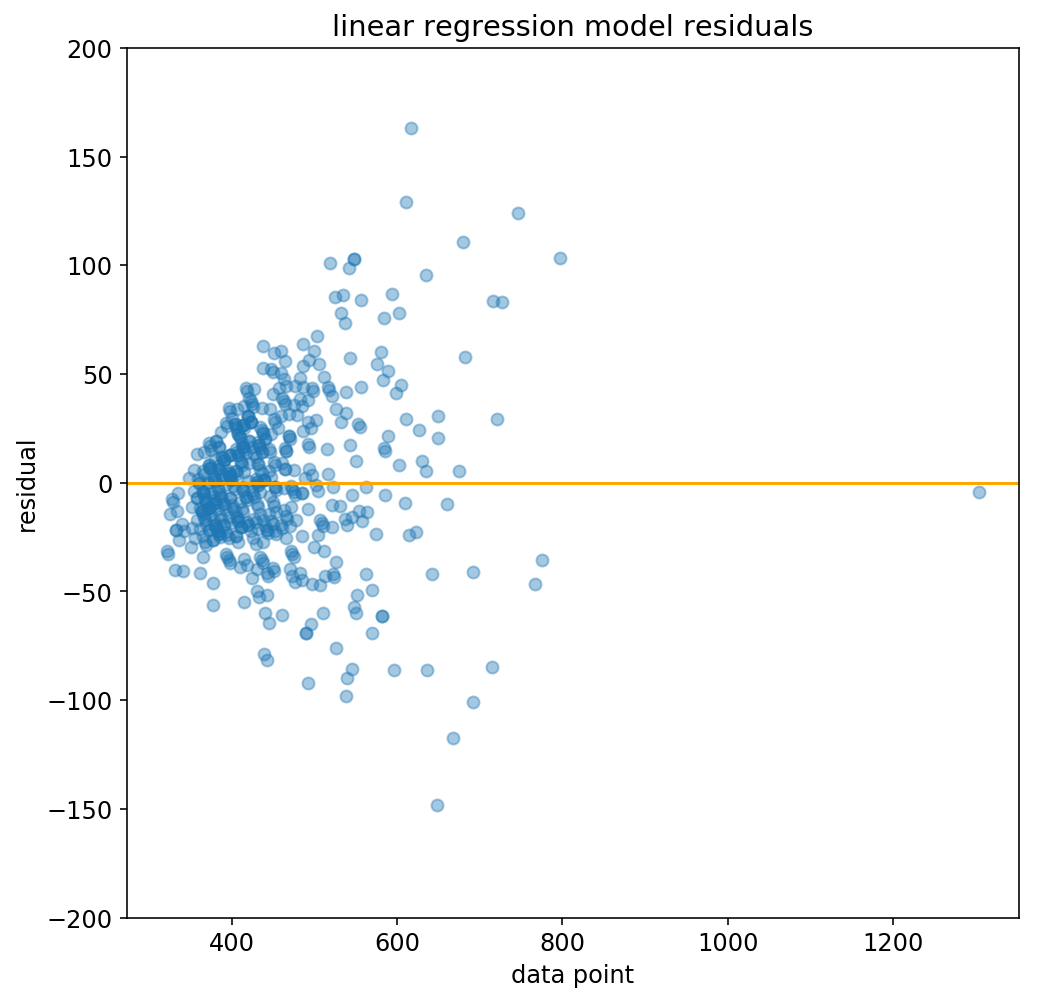

In [39]:
plt.scatter(y_pred, resids, alpha=0.4)
plt.axhline(0, color='orange');
plt.xlabel("data point")
plt.ylabel("residual")
# plt.xlim(0,)
plt.ylim(-200,200)
plt.title("linear regression model residuals")
plt.savefig("../Figures/" + section_fig_main_title +"lr_residu_1.png")

In [40]:
X_sm = sm.add_constant(X)
ols = sm.OLS(y, X_sm).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      V_ICME (km/s) (i)   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1495.
Date:                Sat, 23 Oct 2021   Prob (F-statistic):          4.98e-214
Time:                        21:43:37   Log-Likelihood:                -2613.7
No. Observations:                 513   AIC:                             5233.
Df Residuals:                     510   BIC:                             5246.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              128.3067      6.750     19.009      0.000     115.046     141.568
V_max (km/s) (j)     0.5939      0.011     53.230      0.000       0.572       0.616
B (nT) (k)           1.4838      0.410      3.618      0.000       0.678       2.290
==============================================================================
Omnibus:                      188.738   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3624.336
Skew:                          -1.097   Prob(JB):                         0.00
Kurtosis:                      15.835   Cond. No.                     2.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
def plot(colm_1_name, colm_2_name, lab_name, fromm, too, sizee):
    ax = plt.gca()
    sub_df = df[fromm:too]
    sub_df.plot(kind="scatter", 
                x=colm_1_name, y=colm_2_name,
                s=sub_df[lab_name]/sizee, 
                label=lab_name, 
                c=sub_df[lab_name], 
                cmap=plt.get_cmap("jet"),
                colorbar=True,
                alpha=0.4, figsize=(10,7), 
                ax = ax
                )

    plt.legend()
#     plt.show()
    plt.tight_layout()

In [42]:
numeric_df.columns

Index(['V_ICME (km/s) (i)', 'V_max (km/s) (j)', 'B (nT) (k)'], dtype='object')

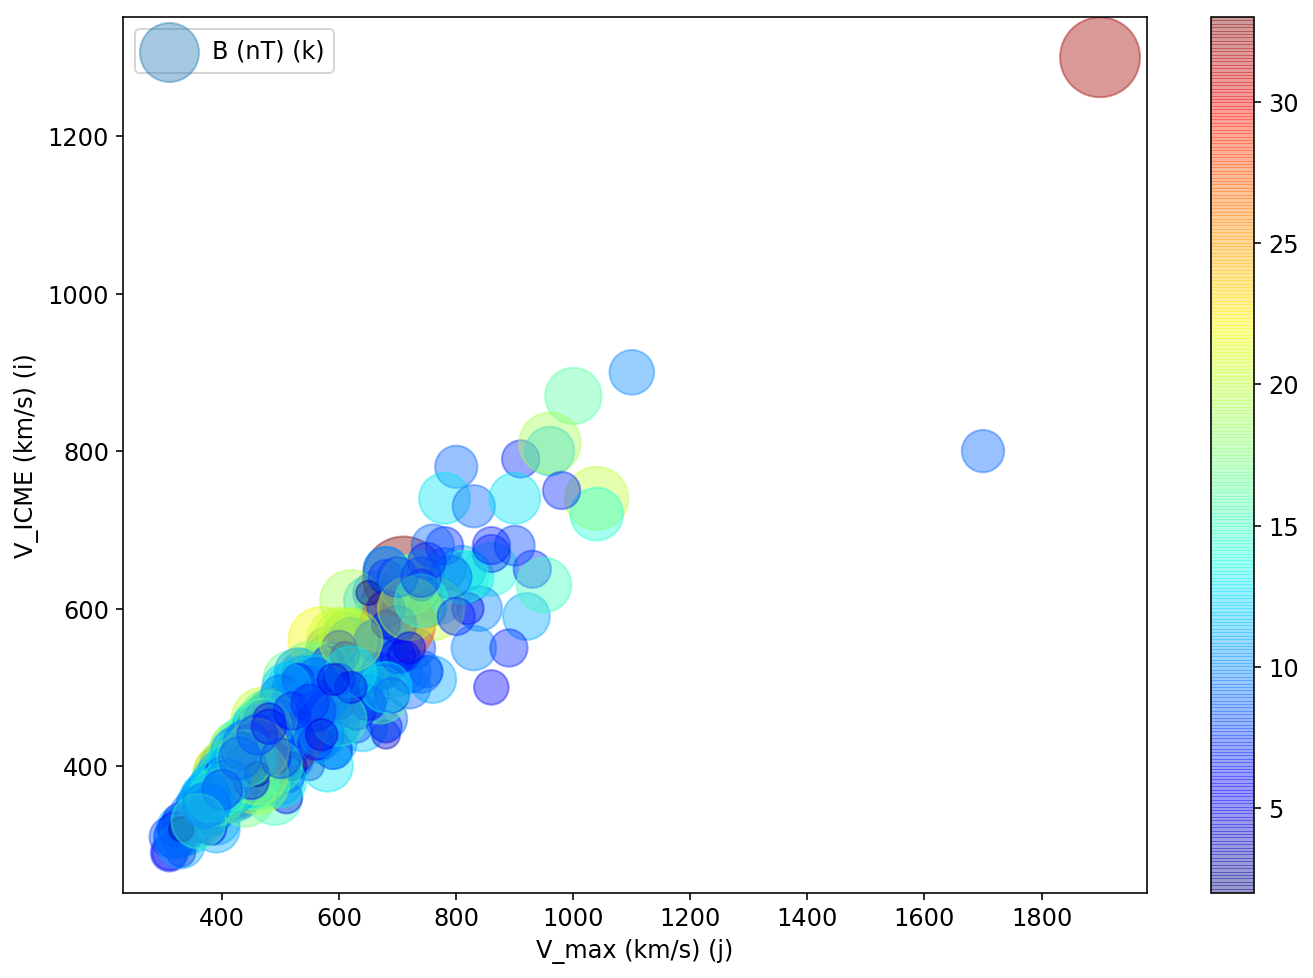

In [43]:
colm_1_name = 'V_max (km/s) (j)'
colm_2_name = 'V_ICME (km/s) (i)'
lab_name = 'B (nT) (k)'
fromm = 0
too = 513
sizee = 0.02

plot(colm_1_name, colm_2_name, lab_name, fromm, too, sizee)
plt.savefig("../Figures/" + section_fig_main_title +"scat_plt_1.png")

plt.show()

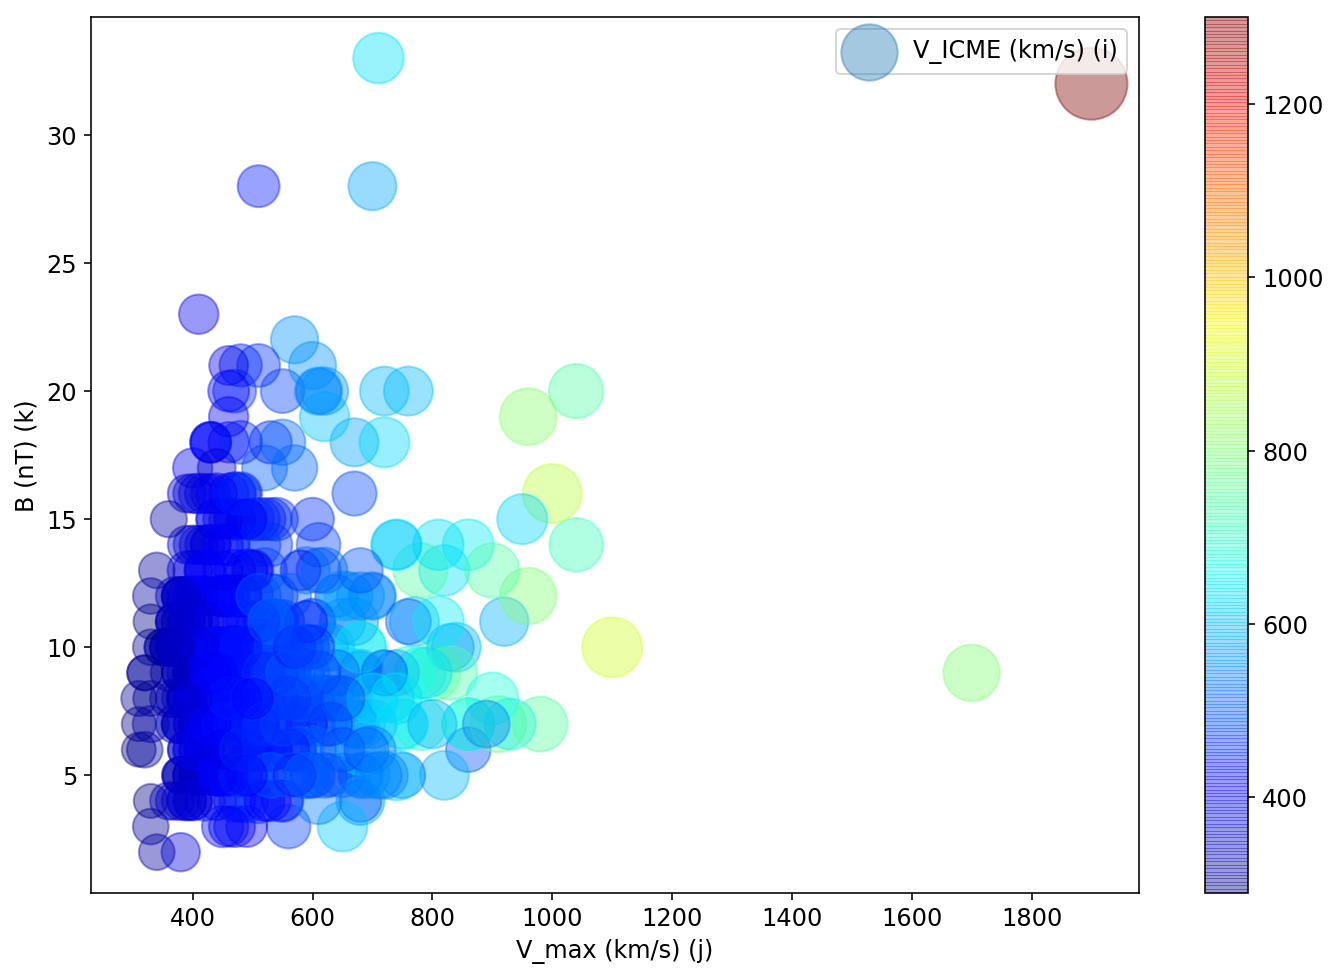

In [44]:
colm_1_name = 'V_max (km/s) (j)'
colm_2_name = 'B (nT) (k)'
lab_name = 'V_ICME (km/s) (i)'
fromm = 0
too = 513
sizee = 1

plot(colm_1_name, colm_2_name, lab_name, fromm, too, sizee)
plt.savefig("../Figures/" + section_fig_main_title +"scat_plt_2.png")

plt.show()

In [45]:
numeric_df.head()

,V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k)
ICME Plasma/Field Start Y/M/D (UT) (b),,,
1996-05-27 15:00:00,370,400,9
1996-07-01 18:00:00,360,370,11
1996-08-07 12:00:00,350,380,7
1996-12-23 17:00:00,360,420,10
1997-01-10 04:00:00,450,460,14


In [46]:
numeric_df.dtypes

V_ICME (km/s) (i)    int64
V_max (km/s) (j)     int64
B (nT) (k)           int64
dtype: object

In [47]:
numeric_df.head()

,V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k)
ICME Plasma/Field Start Y/M/D (UT) (b),,,
1996-05-27 15:00:00,370,400,9
1996-07-01 18:00:00,360,370,11
1996-08-07 12:00:00,350,380,7
1996-12-23 17:00:00,360,420,10
1997-01-10 04:00:00,450,460,14


In [48]:
# # ref: https://gist.github.com/balzer82/5cec6ad7adc1b550e7ee
# # ref : https://towardsdatascience.com/analyzing-time-series-data-in-pandas-be3887fdd621
# import statsmodels.api as sm
# from pylab import rcParams

# # rcParams['figure.figsize'] = 11, 9
# decomposition = sm.tsa.seasonal_decompose(numeric_df['V_max (km/s) (j)'], 
#                                           model="additives", 
#                                           period=1).plot()

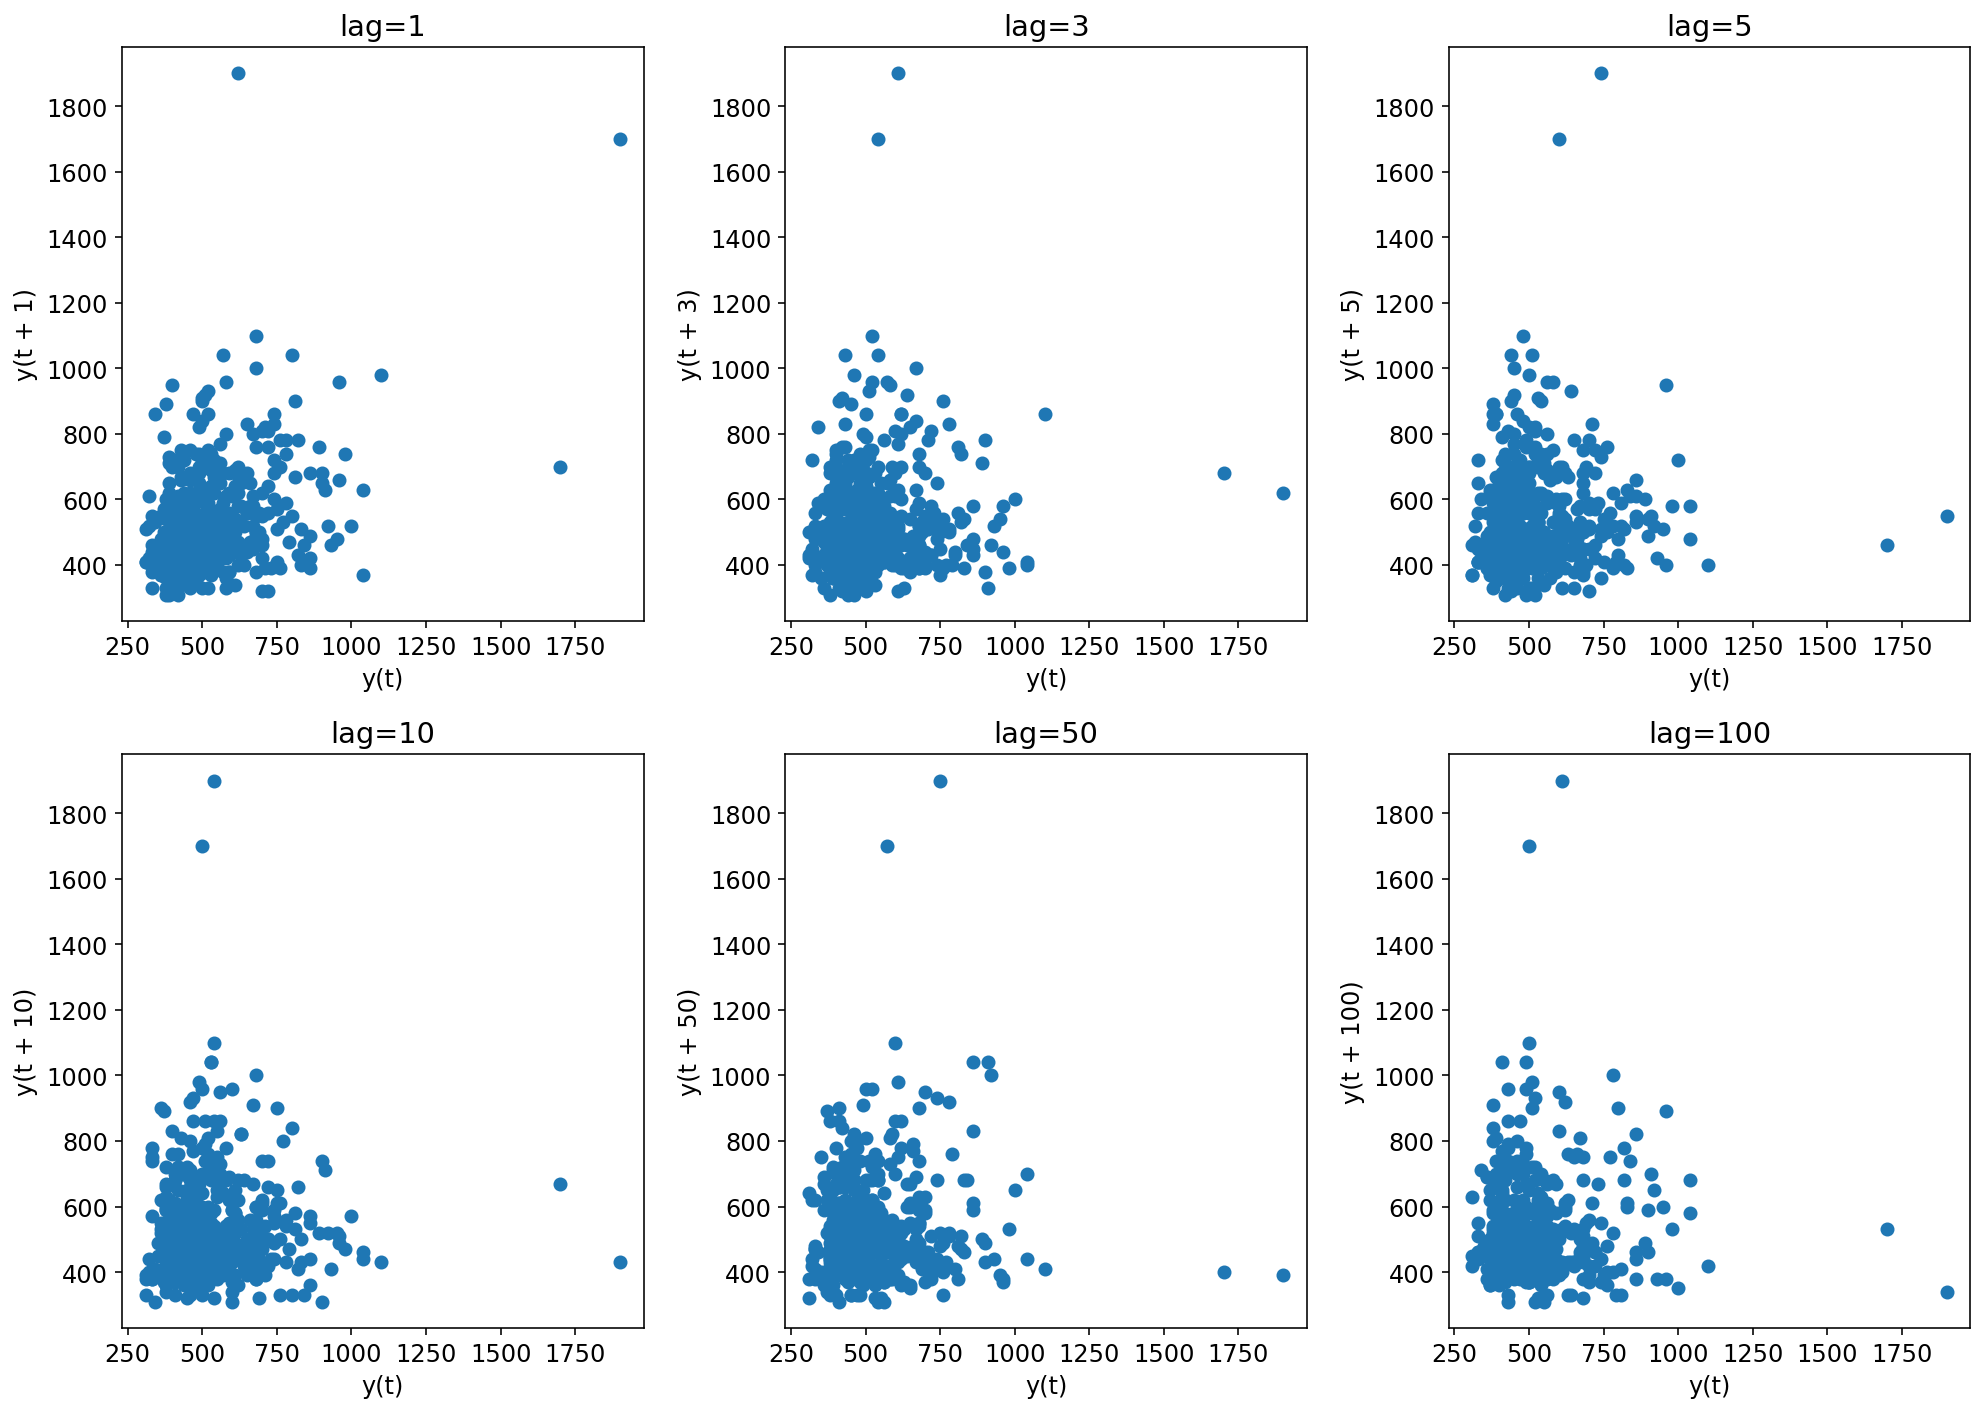

In [49]:
lag_list = [1,3,5,10,50,100]
plt.figure(figsize=(14,10))
for i, lag in enumerate(lag_list):
    
    plt.subplot(2,3,i+1)
    lag_plot(numeric_df['V_max (km/s) (j)'], lag=lag)
    plt.title(f"lag={lag}")

# pyplot.title("Temperature c")
plt.tight_layout()
plt.savefig("../Figures/" + section_fig_main_title +"lags_plt_1.png")

plt.show()

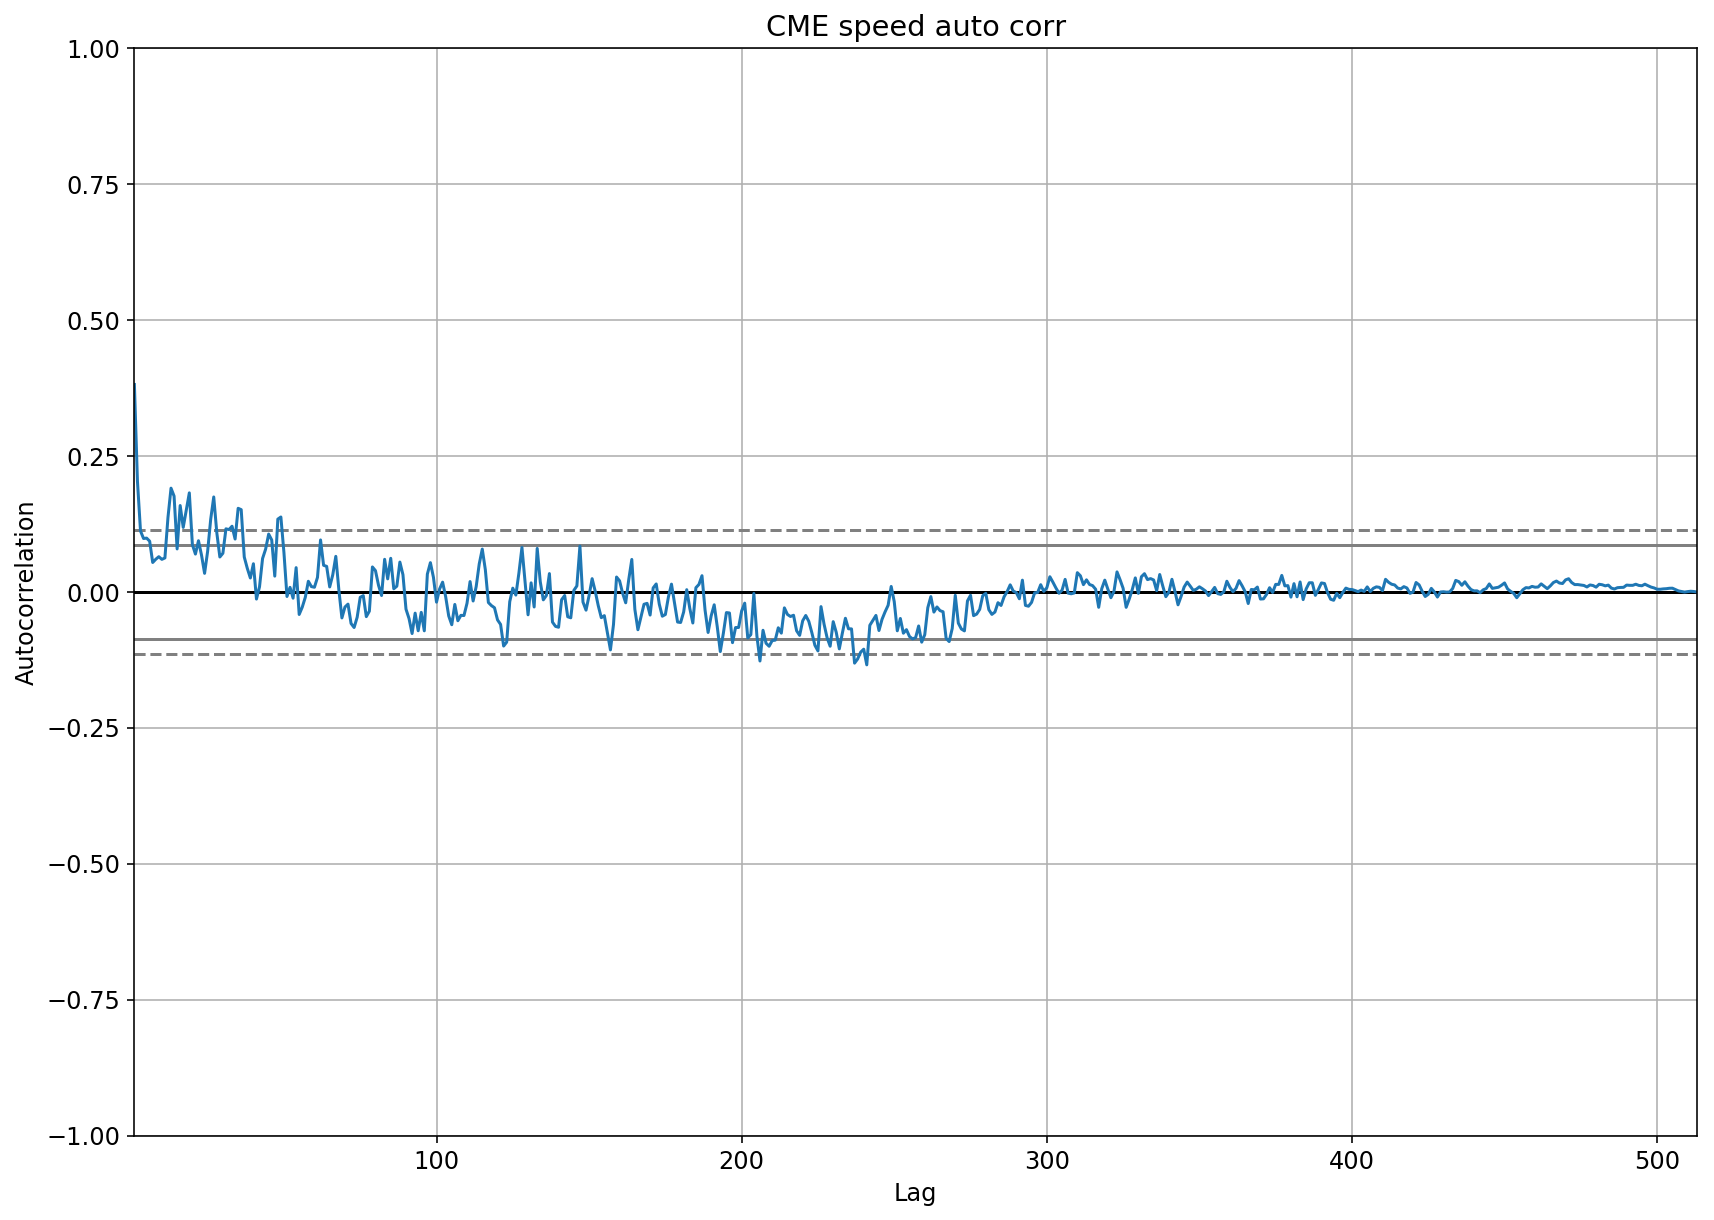

In [50]:
# source https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/
plt.figure(figsize=(14,10))
autocorrelation_plot(numeric_df['V_max (km/s) (j)'])
plt.title("CME speed auto corr")
plt.savefig("../Figures/" + section_fig_main_title +"autocorr_plt_1.png")

plt.show()

almost no significant autocorrelation is seen in data for ICME max speed

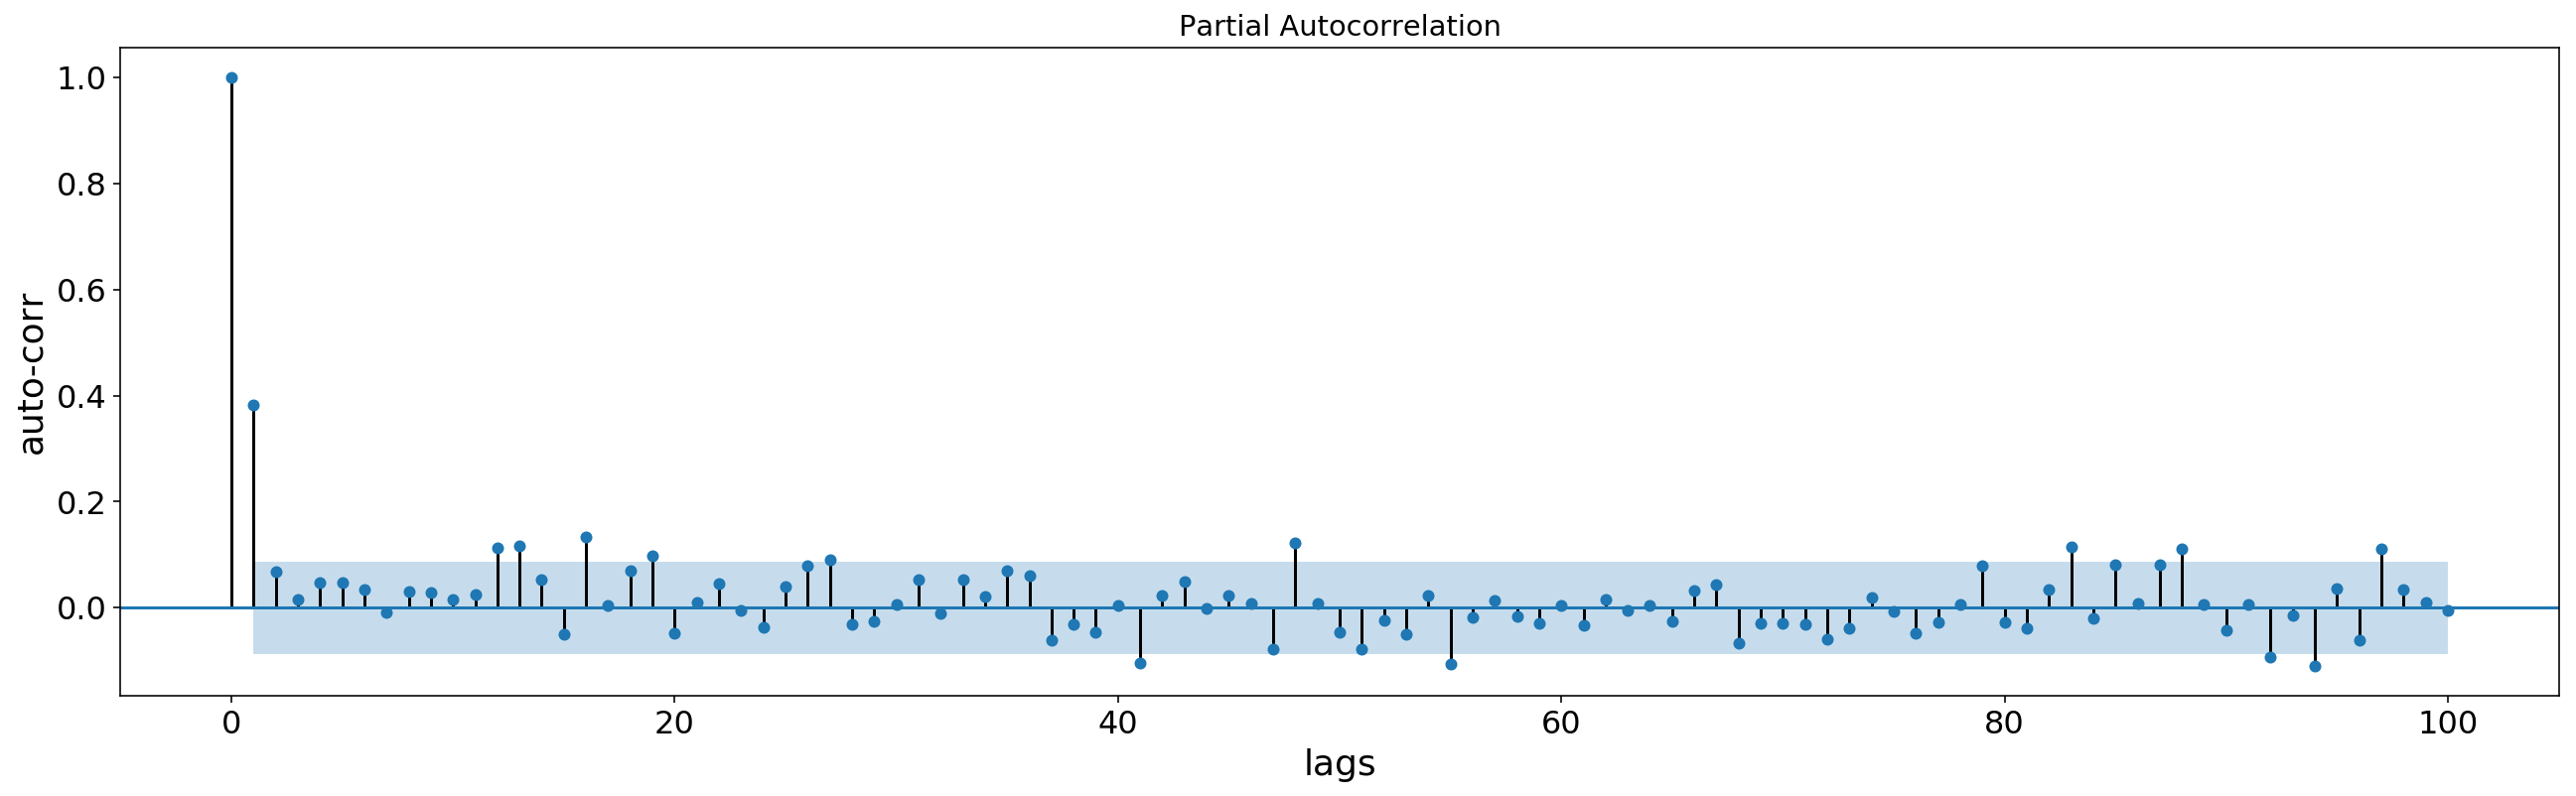

In [51]:
plt.rc("figure", figsize=(22,6))
sm.graphics.tsa.plot_pacf(numeric_df['V_max (km/s) (j)'].values.squeeze(), lags=100)
plt.xlabel('lags', fontsize=18)
plt.ylabel('auto-corr', fontsize=18)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.savefig("../Figures/" + section_fig_main_title +"autocorr_plt_2.png")

plt.show()

as it is observed the partial autocorrelation after two lags are pretty low which is a sign of stationary data.

The data auto-correlation decay instantly which is a sign of stationary data.

Two methods can be used for evaluating the time series data inclduing, Plotting Rolling Statistics and Dickey-Fuller Test.

In [52]:
# modified ref: https://www.kaggle.com/kanncaa1/time-series-prediction-tutorial-with-eda
# adfuller library 
from statsmodels.tsa.stattools import adfuller

In [53]:
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
    
# check_mean_std
def check_mean(ts,windo):
    #Rolling statistics
    
    rolmean = pd.Series(ts).rolling(window=windo).mean()
    rolstd = pd.Series(ts).rolling(window=windo).std()
    
    
#     rolmean = pd.rolling_mean(ts, window=6)
#     rolstd = pd.rolling_std(ts, window=6)
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
#     std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("ICME lm/s")
    plt.title('Rolling Mean')
    
#     plt.ylim(0,)
    
    plt.legend()
    
    plt.savefig("../Figures/" + section_fig_main_title +"rollmean_plt_1.png")
    plt.show()
    
    
    
# check_mean_std
def check_std(ts, windo):
    #Rolling statistics
    
    rolmean = pd.Series(ts).rolling(window=windo).mean()
    rolstd = pd.Series(ts).rolling(window=windo).std()
    
    
#     rolmean = pd.rolling_mean(ts, window=6)
#     rolstd = pd.rolling_std(ts, window=6)
    plt.figure(figsize=(22,10))   
#     orig = plt.plot(ts, color='red',label='Original')
#     mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("ICME lm/s")
    plt.title('Rolling Standard Deviation')
    
#     plt.ylim(0,)
    
    plt.legend()
    plt.savefig("../Figures/" + section_fig_main_title +"rollstd_plt_1.png")

    plt.show()

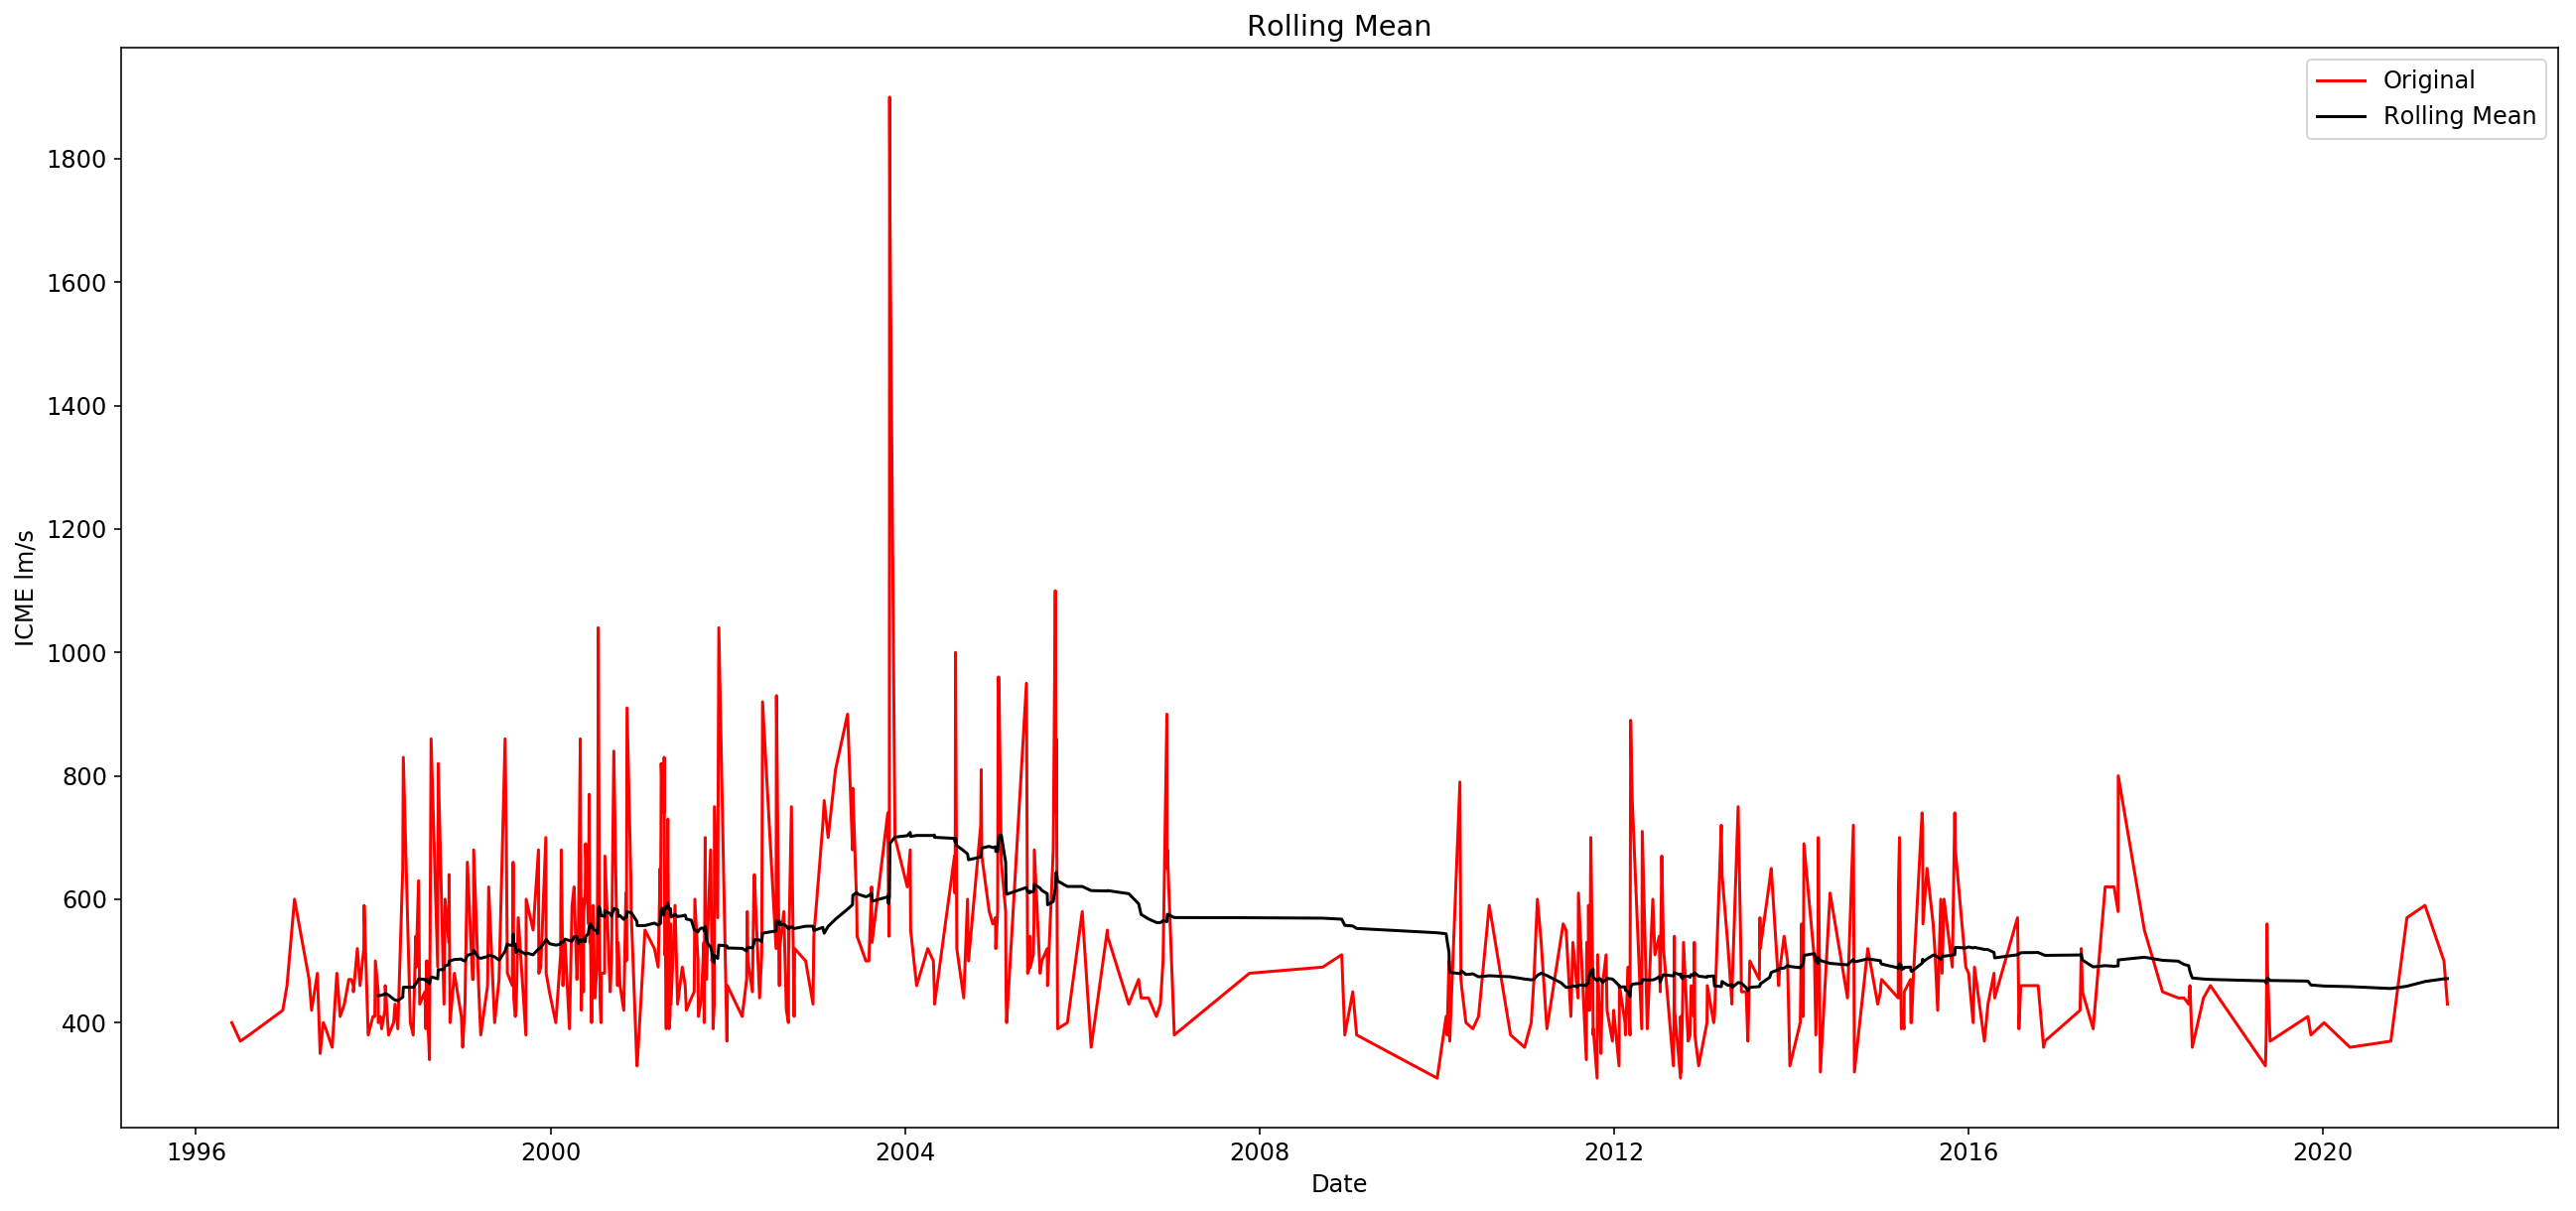

In [54]:
# check stationary: mean, variance(std)and adfuller test
check_mean(numeric_df['V_max (km/s) (j)'], windo=30)

it is seen that the mean is not constant (black curve) so it looks like that we do have NO STATIONARY pressure data.



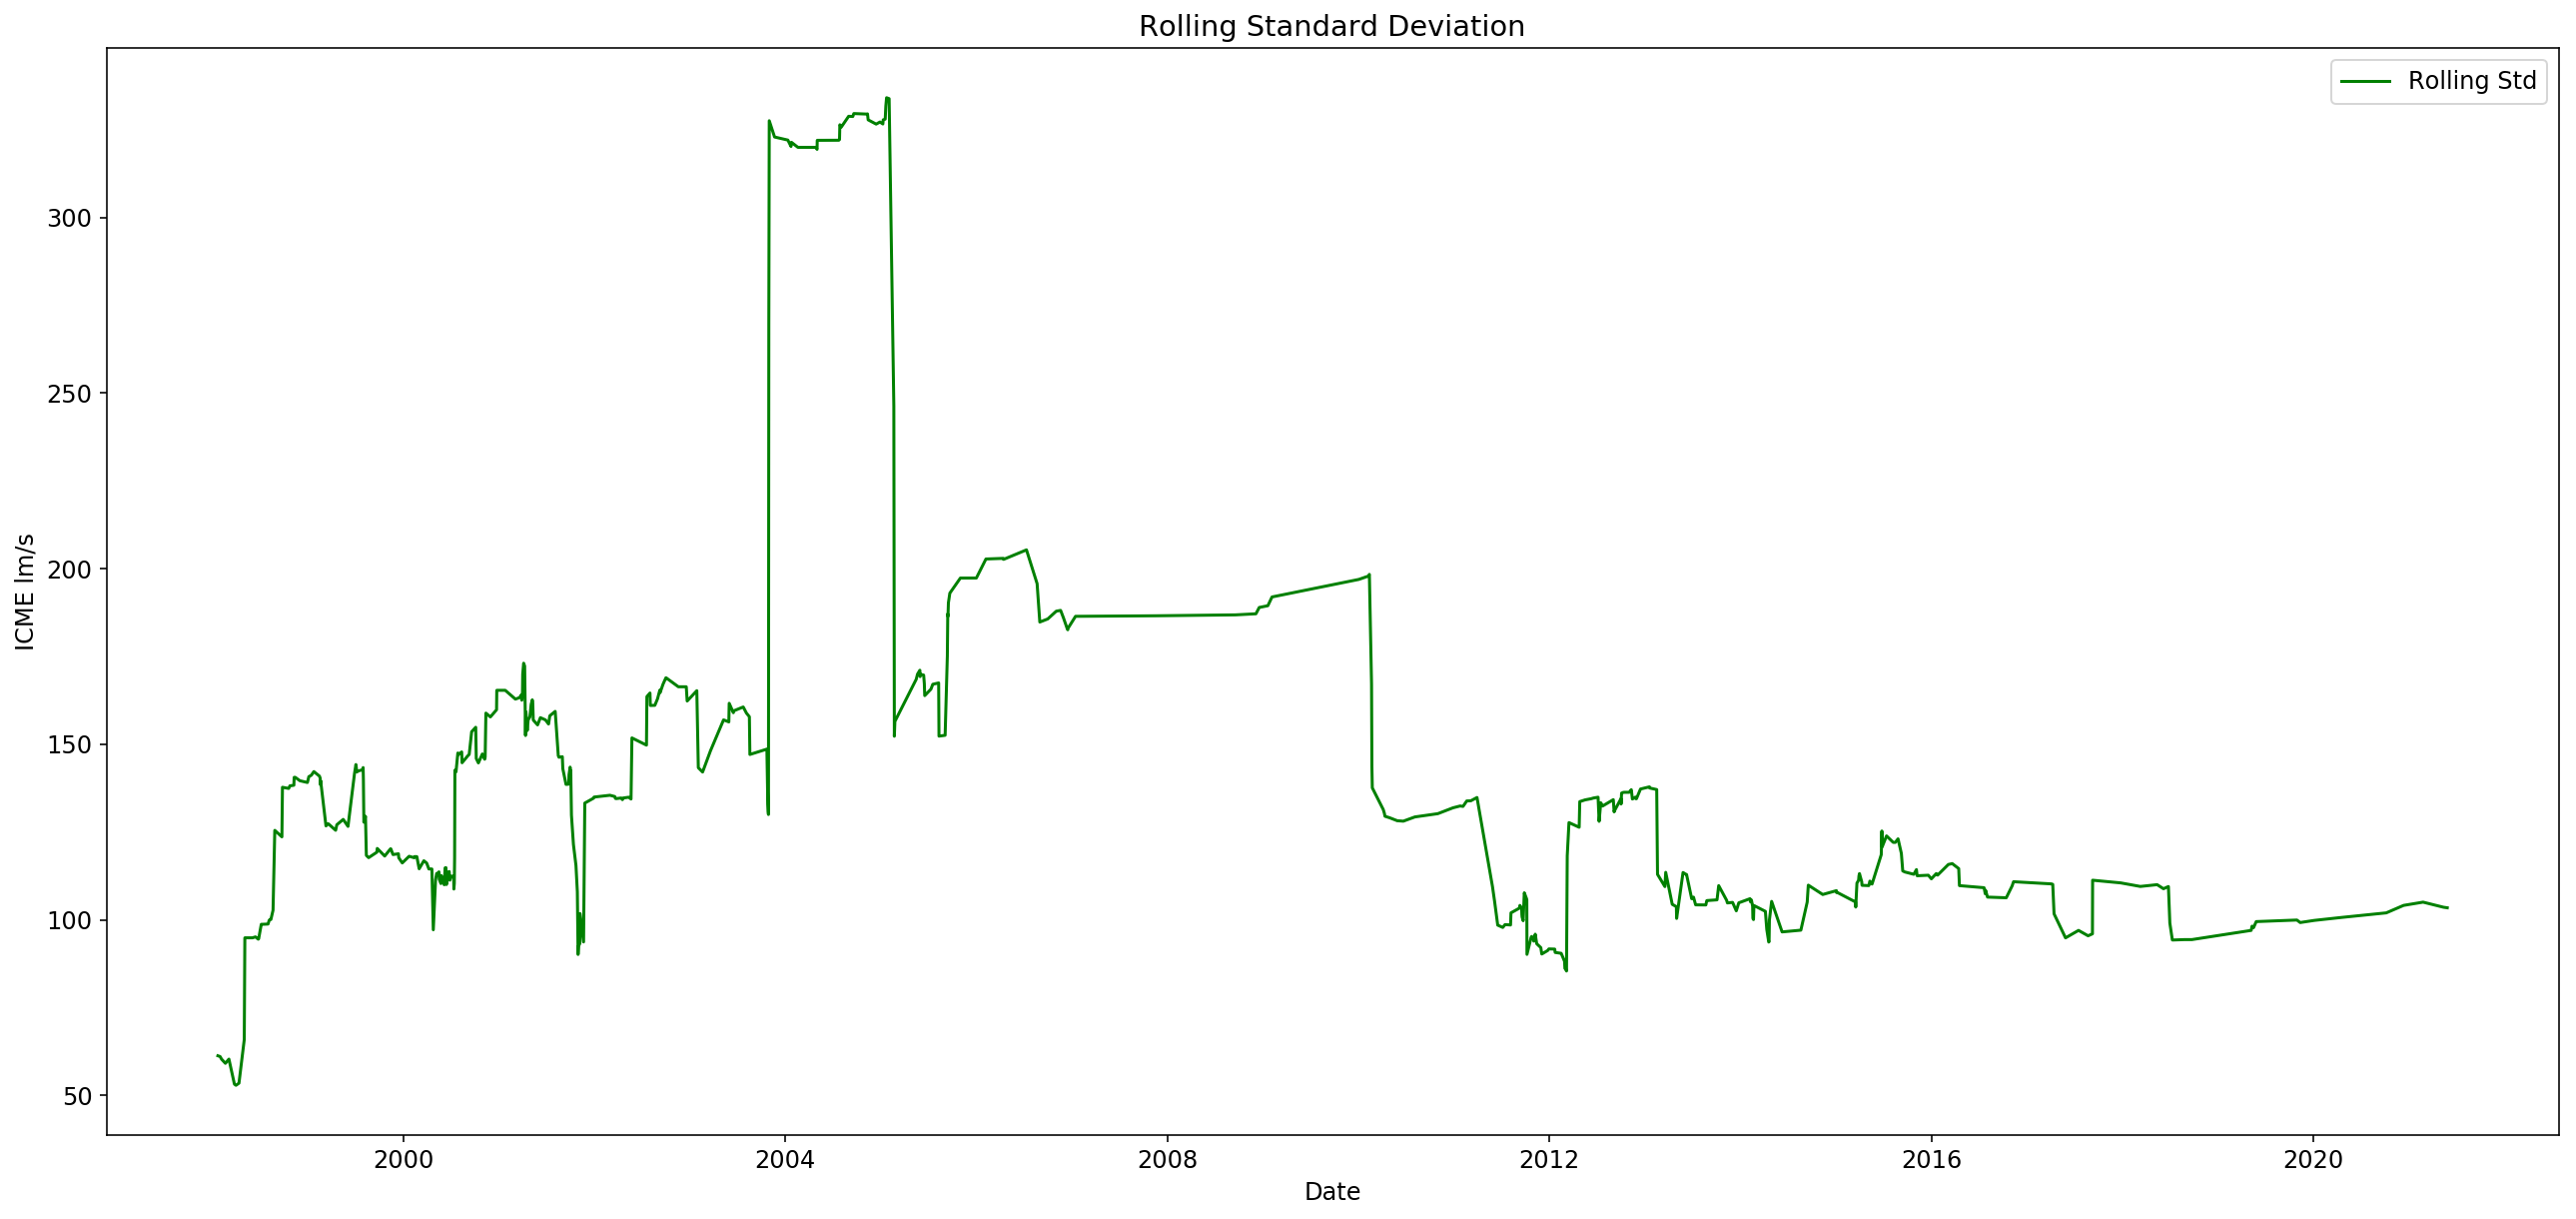

In [55]:
check_std(numeric_df['V_max (km/s) (j)'], windo=30)

the roll std of data is not constant so we can infer that we do have NO - STATIONARY data.

Let's check out the last method and see if the data is stationary.

Using adfuller to find out if the data is stationary:

If the test statistic is less than the critical value, we can say that the time series is stationary.

In [56]:
check_adfuller(numeric_df['V_max (km/s) (j)'])

Test statistic:  -2.720253925137238
p-value:  0.07059855183264732
Critical Values: {'1%': -3.4436568932270095, '5%': -2.8674084917497074, '10%': -2.5698956806372832}


the adfuller shows the pressure data is STATIONARY - the test stat is less than 10%.

based on adfuller test all data are stationary with 90% confidence.

In case of having non stationary data, several approaches can be applied to fix the data. There are two reasons for having non-stationary data including Seasonality and trend. The data has trend when the data mean (is function of window size) varied versus time and Seasonality is cycles that are repeat over time.